# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [ ]:
# Import the libraries you will be using for analysis



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df= pd.read_parquet('/content/taxi_dataset/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
os.chdir('/content/taxi_dataset')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/taxi_dataset')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # Ensure that the 'tpep_pickup_datetime' is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour


        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['pickup_date'].unique():
        # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = monthly_data[(monthly_data['pickup_date'] == date) & (monthly_data['pickup_hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('sampled_nyc_taxi_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df.to_parquet('sampled_nyc_taxi_2023.parquet')

In [ ]:
# df.head()
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1164            2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
1868            2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
3106            1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
808             2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   
169             2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
2995372         2  2023-01-01 00:45:00   2023-01-01 01:21:00              NaN   
2995332         2  2023-01-01 00:56:00   2023-01-01 01:08:45              NaN   
3792            2  2023-01-01 00:13:54   2023-01-01 00:21:26              1.0   
2906            2  2023-01-01 00:47:17   2023-01-01 01:05:27              1.0   
1053            2  2023-01-01 00:45:30   2023-01-01 00:52:35              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1164              0.49         1.0                  N           239   
1868              0.75         1.0                  N            45   
3106              2.90         1.0                  N           142   
808               2.50         1.0                  N            43   
169              20.37         2.0                  N           132   
2995372           6.00         NaN               None           234   
2995332           2.89         NaN               None           181   
3792              2.03         1.0                  N           142   
2906              2.63         1.0                  N           163   
1053              1.32         1.0                  N           229   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1164              238             1  ...      0.5        1.88          0.00   
1868              148             2  ...      0.5        0.00          0.00   
3106              170             1  ...      0.5        4.80          0.00   
808               161             1  ...      0.5        7.25          0.00   
169               140             1  ...      0.5       12.00          6.55   
2995372           225             0  ...      0.5        0.00          0.00   
2995332            17             0  ...      0.5        3.73          0.00   
3792               75             1  ...      0.5        3.14          0.00   
2906               79             1  ...      0.5        4.54          0.00   
1053              170             1  ...      0.5        2.72          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
1164                       1.0         11.28                   2.5   
1868                       1.0         12.90                   2.5   
3106                       1.0         28.90                   2.5   
808                        1.0         36.25                   2.5   
169                        1.0         92.55                   2.5   
2995372                    1.0         42.77                   NaN   
2995332                    1.0         22.40                   NaN   
3792                       1.0         18.84                   2.5   
2906                       1.0         27.24                   2.5   
1053                       1.0         16.32                   2.5   

         airport_fee  pickup_date  pickup_hour Airport_fee  
1164             0.0   2023-01-01            0         NaN  
1868             0.0   2023-01-01            0         NaN  
3106             0.0   2023-01-01            0         NaN  
808              0.0   2023-01-01            0         NaN  
169              0.0   2023-01-01            0         NaN  
2995372          NaN   2023-01-01            0         NaN  
2995332          NaN   2023-01-01            0         NaN  
3792             0.0   2023-01-01            0         NaN  
2906             0.0   2023-01-01            0         NaN  
1053             0.0   2023-01-01            0         NaN  

[10 rows x 22 columns]

In [ ]:
# df.info()
df.info() # Check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 1915511 entries, 3468 to 2835376
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
df.isnull().sum()  # Check for null values in the dataframe

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65140
trip_distance                  0
RatecodeID                 65140
store_and_fwd_flag         65140
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65140
Airport_fee               214954
pickup_date                    0
pickup_hour                    0
airport_fee              1765697
dtype: int64

In [ ]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
 18  pickup_date           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df['airport_fee_combined']= df['airport_fee'] + df['Airport_fee']
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True,axis=1)

In [ ]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-07-01 00:36:53   2023-07-01 00:44:52              3.0   
1         1  2023-07-01 00:41:47   2023-07-01 00:44:30              2.0   
2         2  2023-07-01 00:20:02   2023-07-01 00:46:03              2.0   
3         2  2023-07-01 00:50:54   2023-07-01 00:57:54              1.0   
4         2  2023-07-01 00:13:32   2023-07-01 00:52:21              1.0   
5         2  2023-07-01 00:45:37   2023-07-01 00:58:18              1.0   
6         2  2023-07-01 00:42:18   2023-07-01 00:53:26              5.0   
7         2  2023-07-01 00:15:21   2023-07-01 00:23:30              1.0   
8         2  2023-07-01 00:55:04   2023-07-01 01:07:50              1.0   
9         1  2023-07-01 00:21:16   2023-07-01 00:32:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.20         1.0           230           246             1   
1           0.40         1.0           107           234             3   
2          10.42         1.0           132            72             2   
3           1.79         1.0           263           229             1   
4           9.43         1.0           132           198             2   
5           2.89         1.0           231           231             1   
6           1.95         1.0           158            79             2   
7           1.95         1.0           230           249             1   
8           3.70         1.0            79           255             1   
9           1.50         1.0            79           158             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          8.6    3.5      0.5        2.70           0.0   
1          4.4    3.5      0.5        0.00           0.0   
2         42.2    1.0      0.5        0.00           0.0   
3         10.0    1.0      0.5        3.00           0.0   
4         48.5    1.0      0.5        0.00           0.0   
5         16.3    1.0      0.5        4.26           0.0   
6         12.1    1.0      0.5        0.00           0.0   
7         10.7    1.0      0.5        3.14           0.0   
8         19.1    1.0      0.5        4.82           0.0   
9         10.0    3.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         16.30                   2.5  2023-07-01   
1                    1.0          9.40                   2.5  2023-07-01   
2                    1.0         44.70                   0.0  2023-07-01   
3                    1.0         18.00                   2.5  2023-07-01   
4                    1.0         52.75                   0.0  2023-07-01   
5                    1.0         25.56                   2.5  2023-07-01   
6                    1.0         17.10                   2.5  2023-07-01   
7                    1.0         18.84                   2.5  2023-07-01   
8                    1.0         28.92                   2.5  2023-07-01   
9                    1.0         18.00                   2.5  2023-07-01   

   pickup_hour  airport_fee_combined  
0            0                   NaN  
1            0                   NaN  
2            0                   NaN  
3            0                   NaN  
4            0                   NaN  
5            0                   NaN  
6            0                   NaN  
7            0                   NaN  
8            0                   NaN  
9            0                   NaN

In [ ]:
df.airport_fee_combined.fillna(0.0, inplace=True)

<ipython-input-13-2329819af33b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.airport_fee_combined.fillna(0.0, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0].head(10)




VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29          2  2023-07-01 00:50:26   2023-07-01 00:50:51              1.0   
50          2  2023-07-01 00:36:54   2023-07-01 00:38:23              1.0   
82          2  2023-07-01 00:24:18   2023-07-01 00:34:21              1.0   
108         2  2023-07-01 00:15:39   2023-07-01 00:16:33              1.0   
141         2  2023-07-01 00:34:39   2023-07-01 00:49:26              1.0   
197         2  2023-07-01 01:58:40   2023-07-01 02:05:22              1.0   
277         2  2023-07-01 01:35:56   2023-07-01 01:41:26              2.0   
313         2  2023-07-01 01:33:58   2023-07-01 01:43:37              4.0   
405         2  2023-07-01 02:12:25   2023-07-01 02:20:18              1.0   
441         2  2023-07-01 02:20:38   2023-07-01 02:26:34              1.0   

     trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
29            0.05         1.0            42            42             3   
50            0.03         1.0           114           114             4   
82            1.67         1.0           230           239             4   
108           0.15         2.0           138           138             4   
141           3.47         1.0            90           141             2   
197           1.78         1.0            48            68             4   
277           0.65         1.0           144           211             3   
313           1.29         1.0           211            79             4   
405           1.23         1.0            48           164             4   
441           0.45         1.0           144           144             4   

     fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
29          -3.0   -1.0     -0.5         0.0           0.0   
50          -3.7   -1.0     -0.5         0.0           0.0   
82         -11.4   -1.0     -0.5         0.0           0.0   
108        -70.0    0.0     -0.5         0.0           0.0   
141        -17.7   -1.0     -0.5         0.0           0.0   
197        -10.0   -1.0     -0.5         0.0           0.0   
277         -7.2   -1.0     -0.5         0.0           0.0   
313        -10.7   -1.0     -0.5         0.0           0.0   
405         -9.3   -1.0     -0.5         0.0           0.0   
441         -7.2   -1.0     -0.5         0.0           0.0   

     improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
29                    -1.0         -5.50                   0.0  2023-07-01   
50                    -1.0         -8.70                  -2.5  2023-07-01   
82                    -1.0        -16.40                  -2.5  2023-07-01   
108                   -1.0        -73.25                   0.0  2023-07-01   
141                   -1.0        -22.70                  -2.5  2023-07-01   
197                   -1.0        -15.00                  -2.5  2023-07-01   
277                   -1.0        -12.20                  -2.5  2023-07-01   
313                   -1.0        -15.70                  -2.5  2023-07-01   
405                   -1.0        -14.30                  -2.5  2023-07-01   
441                   -1.0        -12.20                  -2.5  2023-07-01   

     pickup_hour  airport_fee_combined  
29             0                   0.0  
50             0                   0.0  
82             0                   0.0  
108            0                   0.0  
141            0                   0.0  
197            1                   0.0  
277            1                   0.0  
313            1                   0.0  
405            2                   0.0  
441            2                   0.0

In [ ]:
#drop mta_tax column as it has only one value
df.drop(columns=['mta_tax'], inplace=True)

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = df[df['fare_amount'] < 0]

ratecode_analysis = negative_fares['RatecodeID'].value_counts()
print(ratecode_analysis)


RatecodeID
1.0    16721
2.0     1324
5.0      369
3.0      223
4.0       88
Name: count, dtype: int64


In [ ]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number'])  # Select only numeric columns
negative_columns = numeric_cols.loc[:, (numeric_cols < 0).any()].columns
negative_columns



Index(['fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
# fix these negative values
for col in negative_columns: # Replace negative values with 0
    df.loc[df[col] < 0, col] = 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df.isnull().mean() * 100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.400659
trip_distance            0.000000
RatecodeID               3.400659
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.400659
pickup_date              0.000000
pickup_hour              0.000000
airport_fee_combined     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

df[df.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28              2  2023-07-01 00:40:52   2023-07-01 01:01:42              NaN   
86              2  2023-07-01 00:43:46   2023-07-01 01:08:08              NaN   
129             2  2023-07-01 00:10:15   2023-07-01 00:15:19              NaN   
131             2  2023-07-01 00:46:00   2023-07-01 00:53:00              NaN   
135             2  2023-07-01 00:58:00   2023-07-01 01:06:00              NaN   
...           ...                  ...                   ...              ...   
1915224         2  2023-02-28 22:10:00   2023-02-28 22:24:00              NaN   
1915271         2  2023-02-28 22:07:42   2023-02-28 22:13:06              NaN   
1915278         2  2023-02-28 22:13:48   2023-02-28 22:36:49              NaN   
1915348         2  2023-02-28 23:21:55   2023-02-28 23:36:12              NaN   
1915427         2  2023-02-28 23:46:00   2023-03-01 00:05:00              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
28                6.31         NaN            79            74             0   
86                5.85         NaN           231            17             0   
129               0.96         NaN           234            79             0   
131               1.18         NaN           211            79             0   
135               1.44         NaN           186            48             0   
...                ...         ...           ...           ...           ...   
1915224           3.17         NaN           161            79             0   
1915271           1.21         NaN           113            90             0   
1915278           6.83         NaN           144           238             0   
1915348           3.17         NaN            87           234             0   
1915427           4.65         NaN           249           140             0   

         fare_amount  extra  tip_amount  tolls_amount  improvement_surcharge  \
28             31.02    0.0        3.50           0.0                    1.0   
86             26.67    0.0        3.00           0.0                    1.0   
129            15.24    0.0        3.85           0.0                    1.0   
131            13.00    0.0        3.40           0.0                    1.0   
135             9.09    0.0        0.00           0.0                    1.0   
...              ...    ...         ...           ...                    ...   
1915224        16.34    0.0        2.03           0.0                    1.0   
1915271        14.29    0.0        1.83           0.0                    1.0   
1915278        29.89    0.0        4.07           0.0                    1.0   
1915348        18.46    0.0        2.25           0.0                    1.0   
1915427        20.22    0.0        4.84           0.0                    1.0   

         total_amount  congestion_surcharge pickup_date  pickup_hour  \
28              38.52                   NaN  2023-07-01            0   
86              33.67                   NaN  2023-07-01            0   
129             23.09                   NaN  2023-07-01            0   
131             20.40                   NaN  2023-07-01            0   
135             13.09                   NaN  2023-07-01            0   
...               ...                   ...         ...          ...   
1915224         22.37                   NaN  2023-02-28           22   
1915271         20.12                   NaN  2023-02-28           22   
1915278         37.96                   NaN  2023-02-28           22   
1915348         24.71                   NaN  2023-02-28           23   
1915427         29.06                   NaN  2023-02-28           23   

         airport_fee_combined  
28                        0.0  
86                        0.0  
129                       0.0  
131                       0.0  
135                       0.0  
...                       ...  
1915224                  

Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)



<ipython-input-21-f253d62d608e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


<ipython-input-22-f570b03efdf2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)




Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee_combined     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe() # Get the summary statistics of the dataframe

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.915511e+06                     1915511                     1915511   
mean   1.735655e+00  2023-07-02 23:05:36.265228  2023-07-02 23:22:58.586357   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 18:29:36         2023-04-02 18:46:38   
50%    2.000000e+00         2023-06-27 18:46:52         2023-06-27 19:01:35   
75%    2.000000e+00         2023-10-06 21:58:00  2023-10-06 22:14:06.500000   
max    6.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.459047e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.915511e+06   1.915511e+06  1.915511e+06  1.915511e+06   
mean      1.356417e+00   4.218820e+00  1.604843e+00  1.652210e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.040000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.590176e+05  9.900000e+01  2.650000e+02   
std       8.780806e-01   2.643076e+02  7.200929e+00  6.401518e+01   

       DOLocationID  payment_type   fare_amount         extra    tip_amount  \
count  1.915511e+06  1.915511e+06  1.915511e+06  1.915511e+06  1.915511e+06   
mean   1.639272e+02  1.185405e+00  1.965519e+01  1.572001e+00  3.514145e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  1.000000e+00   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  2.800000e+00   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  4.400000e+00   
max    2.650000e+02  4.000000e+00  9.046000e+02  2.080000e+01  4.111000e+02   
std    6.986284e+01  5.569648e-01  1.833623e+01  1.825983e+00  4.048837e+00   

       tolls_amount  improvement_surcharge  total_amount  \
count  1.915511e+06           1.915511e+06  1.915511e+06   
mean   5.894853e-01           9.892541e-01  2.862746e+01   
min    0.000000e+00           0.000000e+00  0.000000e+00   
25%    0.000000e+00           1.000000e+00  1.595000e+01   
50%    0.000000e+00           1.000000e+00  2.100000e+01   
75%    0.000000e+00           1.000000e+00  3.072000e+01   
max    1.047500e+02           1.000000e+00  9.061000e+02   
std    2.175026e+00           1.024442e-01  2.293852e+01   

       congestion_surcharge   pickup_hour  airport_fee_combined  
count          1.915511e+06  1.915511e+06             1915511.0  
mean           2.290471e+00  1.426203e+01                   0.0  
min            0.000000e+00  0.000000e+00                   0.0  
25%            2.500000e+00  1.100000e+01                   0.0  
50%            2.500000e+00  1.500000e+01                   0.0  
75%            2.500000e+00  1.900000e+01                   0.0  
max            2.500000e+00  2.300000e+01                   0.0  
std            6.927620e-01  5.812965e+00                   0.0

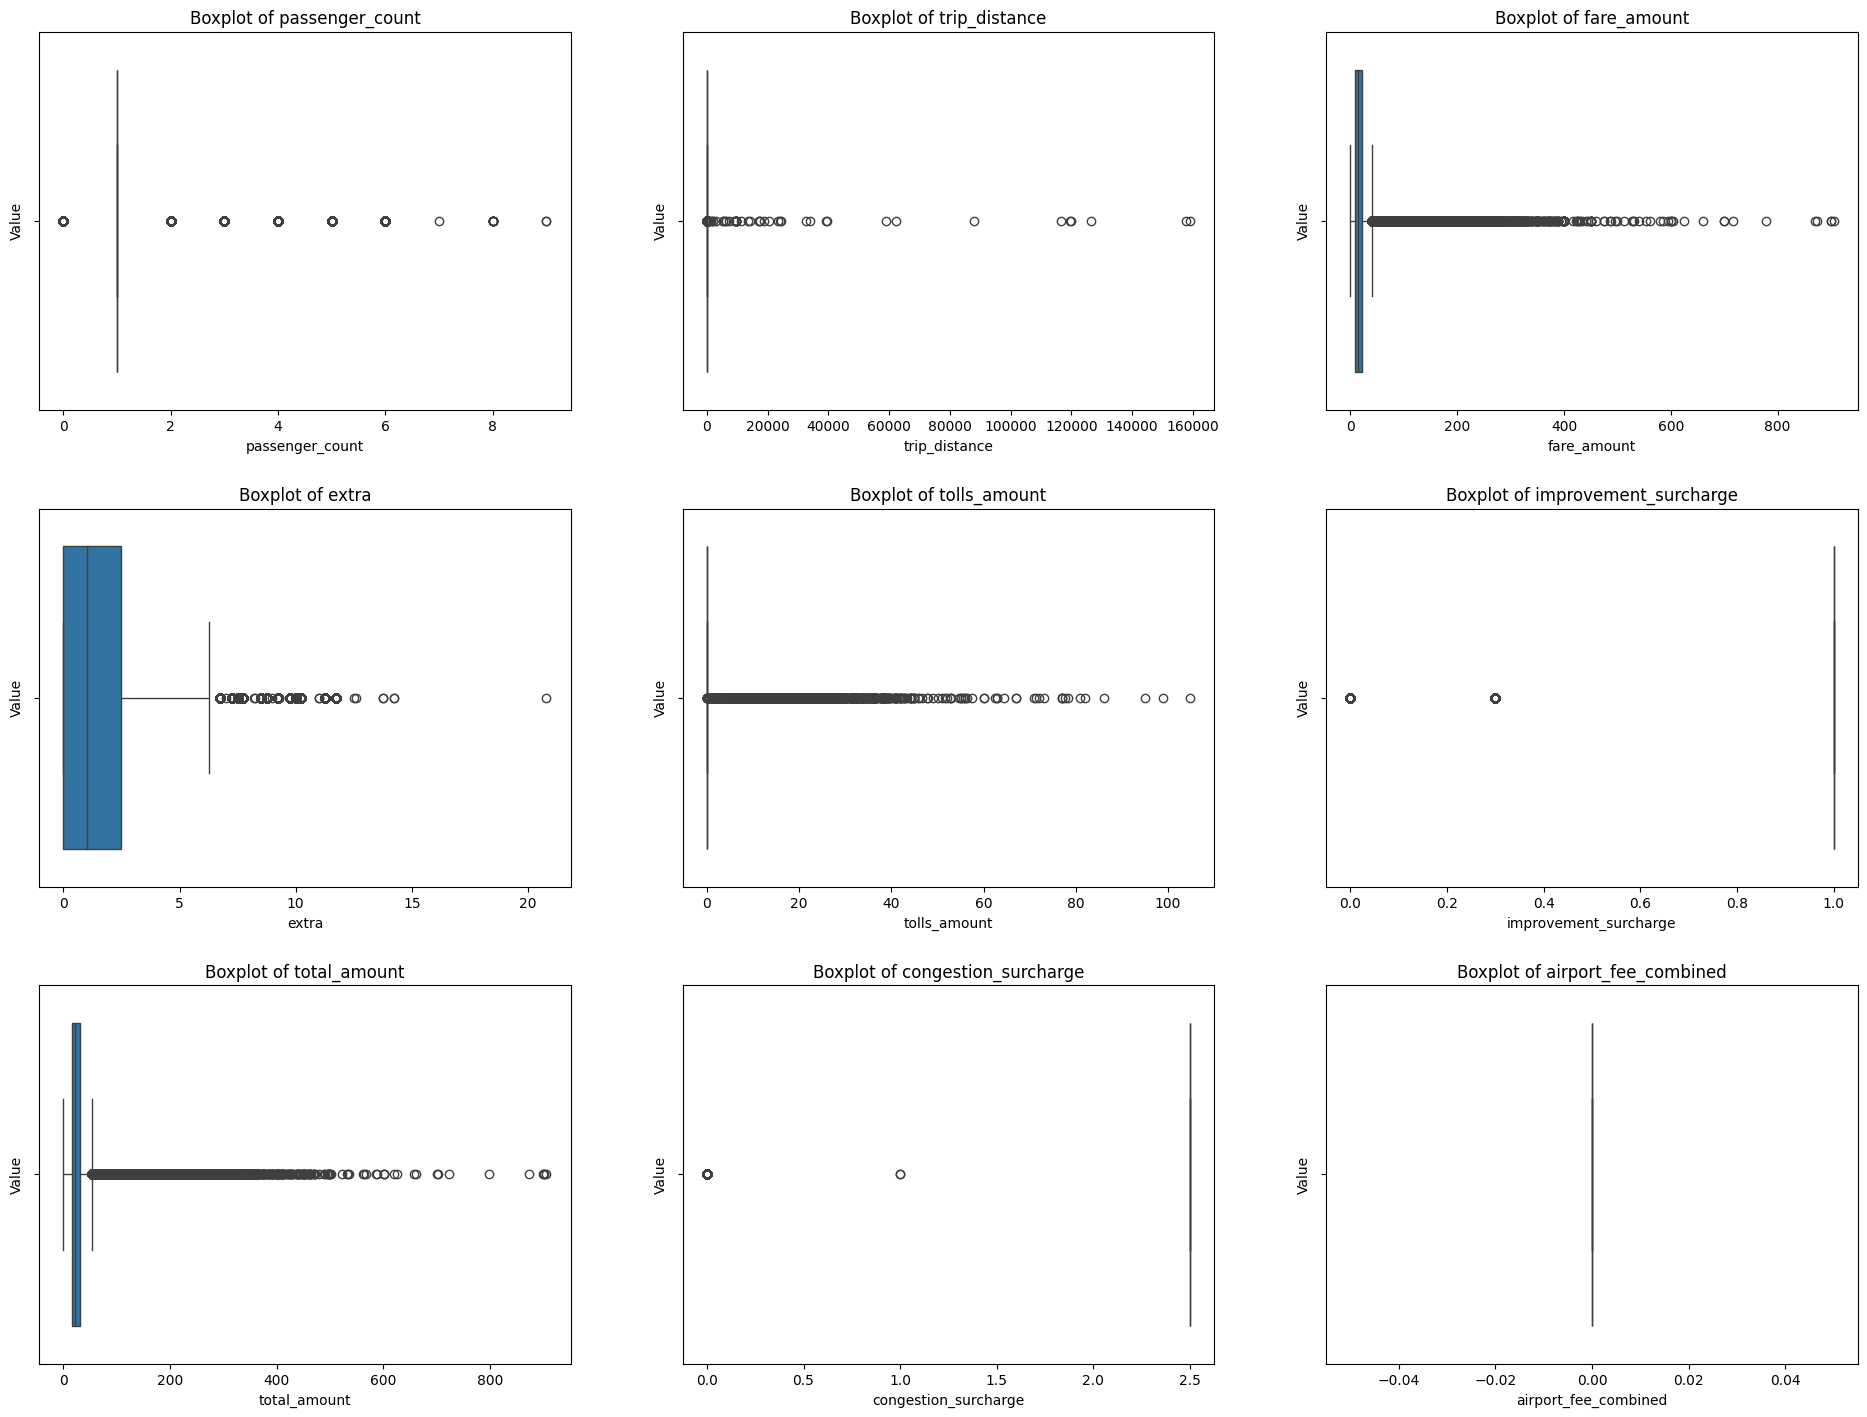

In [ ]:
numeric_cols_to_check = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge','airport_fee_combined'] # List of numeric columns to check for outliers
fig_cols = len(numeric_cols_to_check) # Number of columns to check
rows = fig_cols // 3 + (fig_cols % 3 > 0) # Number of rows for subplots
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows)) # Create subplots for each column
fig.tight_layout(pad=5.0) # Adjust the layout of the subplots
axes = axes.flatten() # Flatten the axes array for easy indexing

for i, col in enumerate(numeric_cols_to_check,1):
    plt.subplot(rows, 3, i) # Create a subplot for each column
    sns.boxplot(x=df[col]) # Create a boxplot for the column
    plt.title(f'Boxplot of {col}') # Set the title of the subplot
    plt.xlabel(col) # Set the x-axis label
    plt.ylabel('Value') # Set the y-axis label
plt.show() # Show the plots

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
(df.passenger_count >6).sum() # Check the number of rows with passenger_count > 6

np.int64(13)

In [ ]:
df = df[df['passenger_count'] <= 6] # Remove rows with passenger_count > 6

In [ ]:
# Continue with outlier handling

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.915498e+06                     1915498                     1915498   
mean   1.735654e+00  2023-07-02 23:05:09.743692  2023-07-02 23:22:32.063894   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 18:28:50.250000  2023-04-02 18:46:19.250000   
50%    2.000000e+00         2023-06-27 18:46:43  2023-06-27 19:01:27.500000   
75%    2.000000e+00  2023-10-06 21:58:00.500000  2023-10-06 22:14:06.750000   
max    6.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.459057e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.915498e+06   1.915498e+06  1.915498e+06  1.915498e+06   
mean      1.356371e+00   4.218820e+00  1.604820e+00  1.652211e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.040000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   1.590176e+05  9.900000e+01  2.650000e+02   
std       8.779082e-01   2.643084e+02  7.200948e+00  6.401523e+01   

       DOLocationID  payment_type   fare_amount         extra    tip_amount  \
count  1.915498e+06  1.915498e+06  1.915498e+06  1.915498e+06  1.915498e+06   
mean   1.639272e+02  1.185406e+00  1.965475e+01  1.572006e+00  3.514109e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  1.000000e+00   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  2.800000e+00   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  4.400000e+00   
max    2.650000e+02  4.000000e+00  9.046000e+02  2.080000e+01  4.111000e+02   
std    6.986296e+01  5.569659e-01  1.833552e+01  1.825982e+00  4.048768e+00   

       tolls_amount  improvement_surcharge  total_amount  \
count  1.915498e+06           1.915498e+06  1.915498e+06   
mean   5.894857e-01           9.892540e-01  2.862700e+01   
min    0.000000e+00           0.000000e+00  0.000000e+00   
25%    0.000000e+00           1.000000e+00  1.595000e+01   
50%    0.000000e+00           1.000000e+00  2.100000e+01   
75%    0.000000e+00           1.000000e+00  3.072000e+01   
max    1.047500e+02           1.000000e+00  9.061000e+02   
std    2.175028e+00           1.024446e-01  2.293789e+01   

       congestion_surcharge   pickup_hour  airport_fee_combined  
count          1.915498e+06  1.915498e+06             1915498.0  
mean           2.290476e+00  1.426205e+01                   0.0  
min            0.000000e+00  0.000000e+00                   0.0  
25%            2.500000e+00  1.100000e+01                   0.0  
50%            2.500000e+00  1.500000e+01                   0.0  
75%            2.500000e+00  1.900000e+01                   0.0  
max            2.500000e+00  2.300000e+01                   0.0  
std            6.927544e-01  5.812957e+00                   0.0

In [ ]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df = df[df['payment_type'] != 0]

In [ ]:
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [ ]:
#df.describe() # Get the summary statistics of the dataframe

In [ ]:
# Do any columns need standardising?

#df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
1         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
2         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
3         2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   
4         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.49         1.0           239           238             1   
1           0.75         1.0            45           148             2   
2           2.90         1.0           142           170             1   
3           2.50         1.0            43           161             1   
4          20.37         2.0           132           140             1   

   fare_amount  extra  tip_amount  tolls_amount  improvement_surcharge  \
0          4.4    1.0        1.88          0.00                    1.0   
1          7.9    1.0        0.00          0.00                    1.0   
2         19.1    3.5        4.80          0.00                    1.0   
3         24.0    1.0        7.25          0.00                    1.0   
4         70.0    0.0       12.00          6.55                    1.0   

   total_amount  congestion_surcharge  airport_fee_combined  
0         11.28                   2.5                   0.0  
1         12.90                   2.5                   0.0  
2         28.90                   2.5                   0.0  
3         36.25                   2.5                   0.0  
4         92.55                   2.5                   0.0

In [ ]:
#(df.tolls_amount>100).sum()

np.int64(0)

In [ ]:
#(df.RatecodeID >6).sum()

np.int64(2077)

In [ ]:
#= df[df['RatecodeID'] <= 6] # Remove rows with RatecodeID > 6

In [ ]:
#(df.tip_amount > 100).sum() # Check the number of rows with tip_amount > 100

np.int64(2)

In [ ]:
#df=df[df['tip_amount'] <= 100] # Remove rows with tip_amount > 100

In [ ]:
#(df.fare_amount >500).sum() # Check the number of rows with fare_amount < 0

np.int64(6)

In [ ]:
#df =df[df['fare_amount'] <= 500] # Remove rows with fare_amount > 500

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-34-6fc631546e94>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")


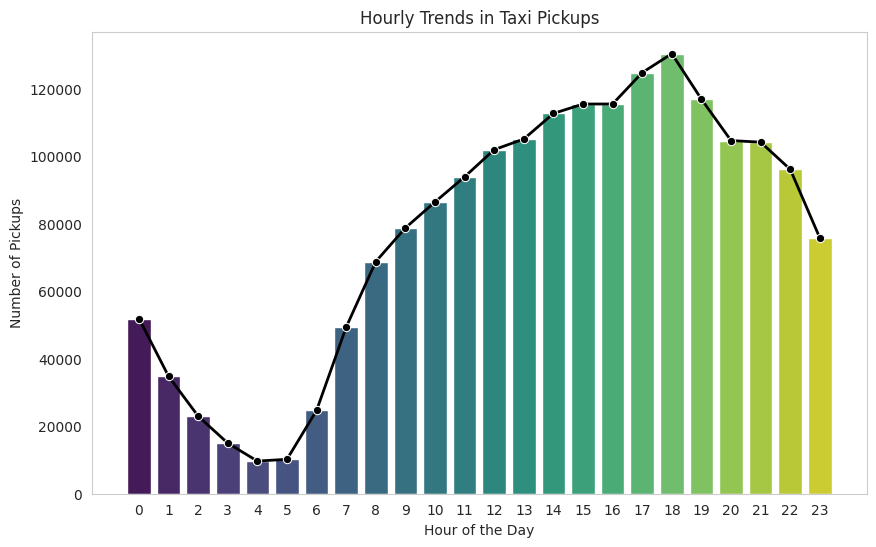

"\ndf['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour\nhourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')\n\nplt.figure(figsize=(10, 6))\nsns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count')\nplt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')\nplt.xlabel('Hour of Day (0–23)')\nplt.ylabel('Number of Pickups')\nplt.xticks(range(0, 24, 1))  # Set x-ticks to show every hour\nplt.xlim(0, 23)  # Set x-axis limits to show only 0-23 hours\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n\n"

In [ ]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour # Extract the hour from the pickup datetime
hourly_pickups = df.groupby('pickup_hour').size() # Group by hour and count the number of pickups

plt.figure(figsize=(10, 6)) # Set the figure size
#sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values) # Create a bar plot for hourly pickups
sns.set_style("whitegrid")
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='black', marker='o', linewidth=2)
plt.title('Hourly Trends in Taxi Pickups') # Set the title of the plot
plt.xlabel('Hour of the Day') # Set the x-axis label
plt.ylabel('Number of Pickups') # Set the y-axis label
plt.xticks(hourly_pickups.index) # Set the x-ticks to the hour values
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot


'''
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24, 1))  # Set x-ticks to show every hour
plt.xlim(0, 23)  # Set x-axis limits to show only 0-23 hours
plt.grid(True)
plt.tight_layout()
plt.show()

'''



In [ ]:
'''sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_trend, palette='viridis')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
'''
#

"sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_trend, palette='viridis')\nplt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')\n"

<ipython-input-35-a29c0a4019c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values,palette="coolwarm")  # Using Seaborn for better aesthetics


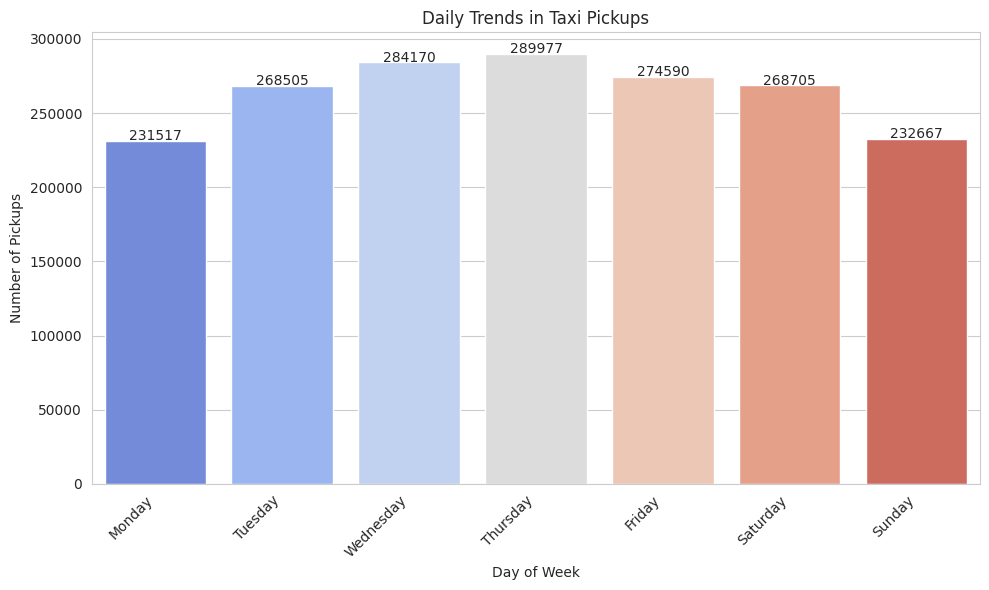

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values,palette="coolwarm")  # Using Seaborn for better aesthetics
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)
plt.show()

<ipython-input-36-544eeffcdd0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma") # Create a bar plot for monthly pickups


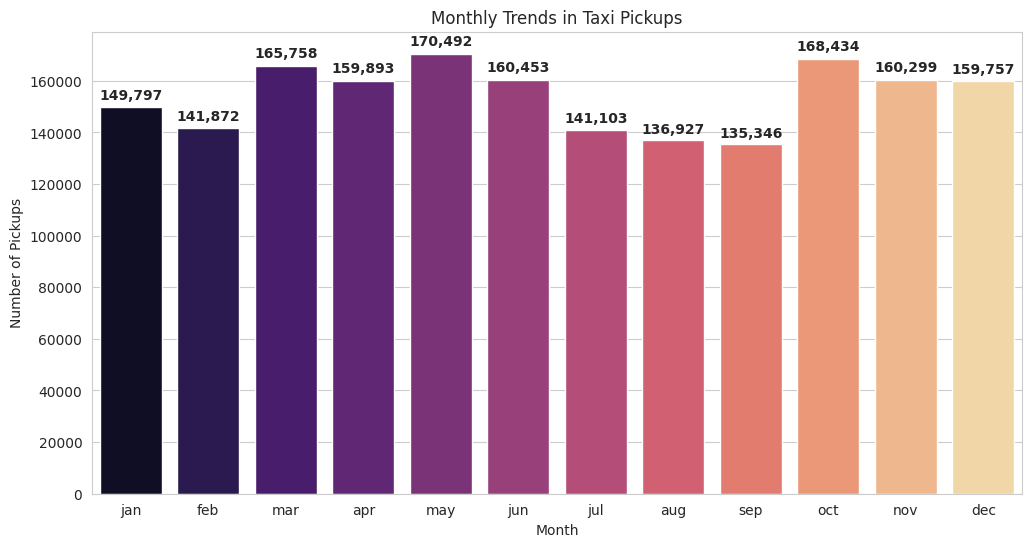

In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month # Extract the month from the pickup datetime
monthly_pickups = df.pickup_month.value_counts().sort_index() # Group by month and count the number of pickups

plt.figure(figsize=(12, 6)) # Set the figure size
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma") # Create a bar plot for monthly pickups
plt.title('Monthly Trends in Taxi Pickups') # Set the title of the plot
plt.xlabel('Month') # Set the x-axis label
plt.ylabel('Number of Pickups') # Set the y-axis label
plt.xticks(ticks=range(12), labels=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')
plt.show() # Show the plot

# Set x-ticks to month names


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
analysis = pd.DataFrame(columns=columns_to_check)
analysis.loc['Zero Count'] = [ (df[col] == 0).sum() for col in columns_to_check ]
analysis.loc['Negative Count'] = [ (df[col] < 0).sum() for col in columns_to_check ]
analysis.round(2)


fare_amount  tip_amount  total_amount  trip_distance
Zero Count            19219      428205         18999          25178
Negative Count            0           0             0              0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
filtered_columns =['fare_amount','tip_amount','total_amount','trip_distance']

#count zero values before filtering
zero_counts_before = df[filtered_columns].eq(0).sum()
print("Zero counts before filtering:")
print(zero_counts_before)


filtered_df = df[(df['fare_amount']>0) & (df['tip_amount']>0) & (df['total_amount']>0)]# Filter out rows with zero values in the specified columns

#removimng zero values in trip_distance
filtered_df = filtered_df[filtered_df['trip_distance'] > 0 | (filtered_df['fare_amount']>0)] # Filter out rows with zero values in trip_distance

#count zero values after filtering
zero_counts_after = filtered_df[filtered_columns].eq(0).sum()
print("Zero counts after filtering:")
print(zero_counts_after)

Zero counts before filtering:
fare_amount       19219
tip_amount       428205
total_amount      18999
trip_distance     25178
dtype: int64
Zero counts after filtering:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
filtered_df[(filtered_df[filtered_columns]==0).any(axis=1)] # Check the rows with zero values in the selected columns


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee_combined, pickup_day, pickup_month]
Index: []

[0 rows x 21 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
df.total_amount.describe() # Get the summary statistics of the total amount column

count    1.850131e+06
mean     3.153533e-02
std      2.534192e-02
min      0.000000e+00
25%      1.738219e-02
50%      2.317625e-02
75%      3.377111e-02
max      1.000000e+00
Name: total_amount, dtype: float64

<ipython-input-41-103ba10dbbfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue['tpep_pickup_datetime'], y=monthly_revenue['total_amount'], palette="magma")


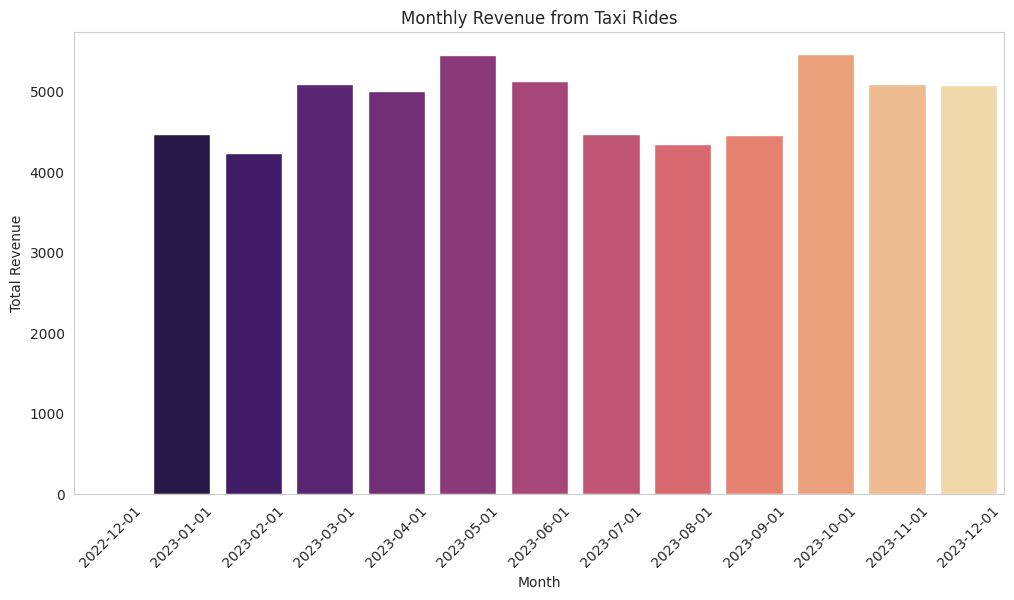

In [ ]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby(df['tpep_pickup_datetime'].dt.to_period('M'))['total_amount'].sum().reset_index()
monthly_revenue['tpep_pickup_datetime'] = monthly_revenue['tpep_pickup_datetime'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue['tpep_pickup_datetime'], y=monthly_revenue['total_amount'], palette="magma")
plt.title('Monthly Revenue from Taxi Rides')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<ipython-input-42-bb875cb5ded2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_revenue['quarter'], y=quarterly_revenue['total_amount'], palette="magma")


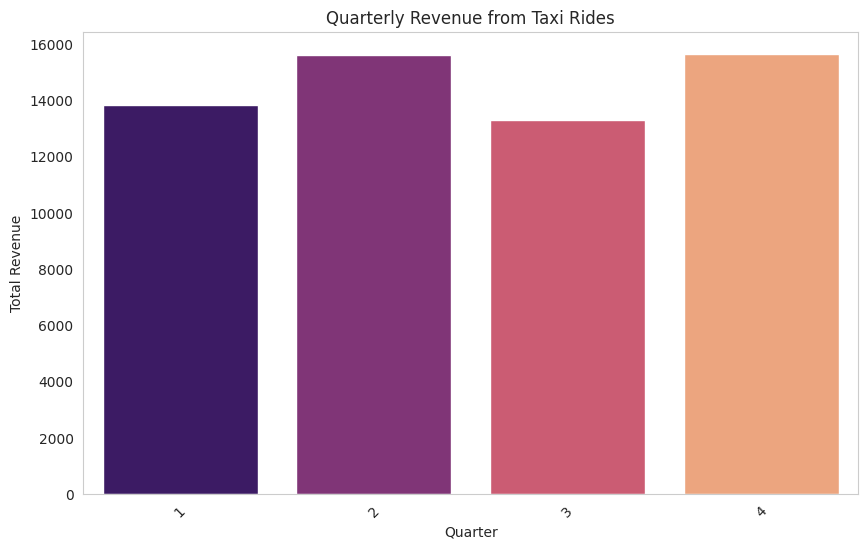

   quarter  total_amount
0        1  13818.919380
1        2  15594.258581
2        3  13286.616985
3        4  15644.691127


In [ ]:
# Calculate proportion of each quarter
monthly_revenue['quarter'] = monthly_revenue['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = monthly_revenue.groupby('quarter')['total_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_revenue['quarter'], y=quarterly_revenue['total_amount'], palette="magma")
plt.title('Quarterly Revenue from Taxi Rides')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print(quarterly_revenue)



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

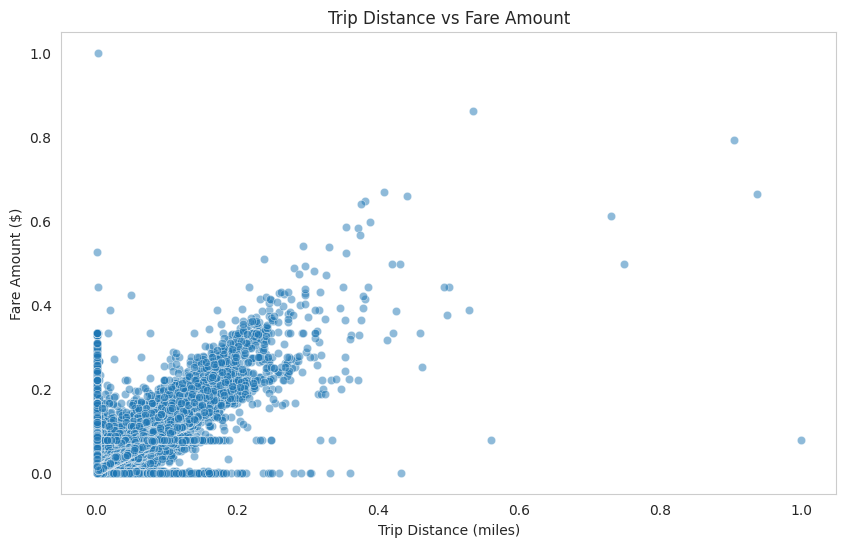

In [ ]:
# Show how trip fare is affected by distance
filtered_df = df[df['trip_distance'] > 0]
plt.figure(figsize=(10, 6)) # Set the figure size
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.show()



In [ ]:
#Finding the Corralation between fare amount and trip distance excluding zero values
filtered_df = df[df['trip_distance'] > 0]
correlation = filtered_df[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")



Correlation between trip distance and fare amount: 0.93


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

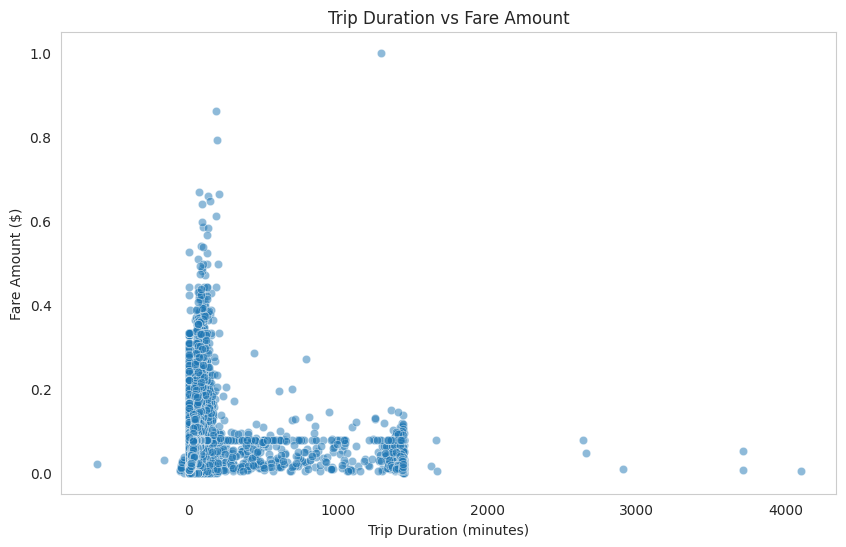

Correlation between trip duration and fare amount: 0.27


In [ ]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.show()

# correlation between trip duration and fare amount
correlation = df[['trip_duration', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")



<ipython-input-46-4df8506f7ebb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='passenger_count', y='fare_amount', data=df, palette="magma")


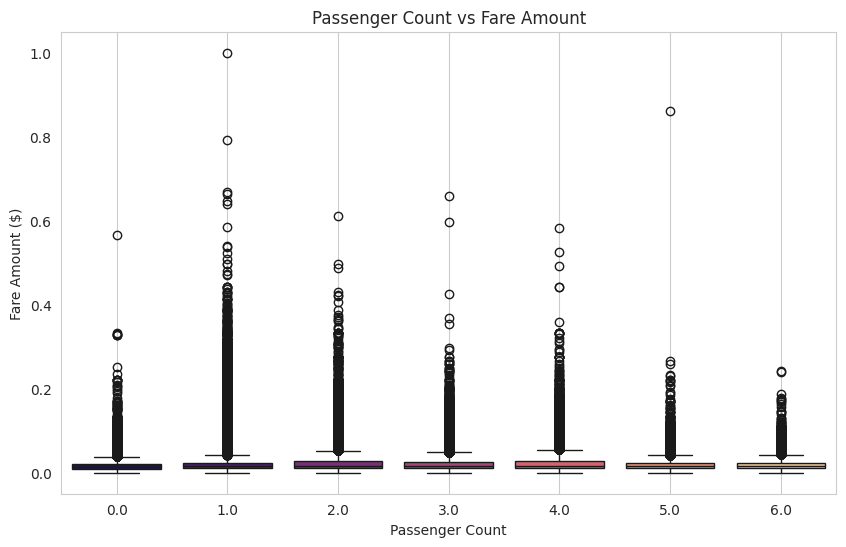

Correlation between passenger count and fare amount: 0.05


In [ ]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df, palette="magma")
plt.title('Passenger Count vs Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.show()
# correlation between passenger count and fare amount
correlation = df[['passenger_count', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")



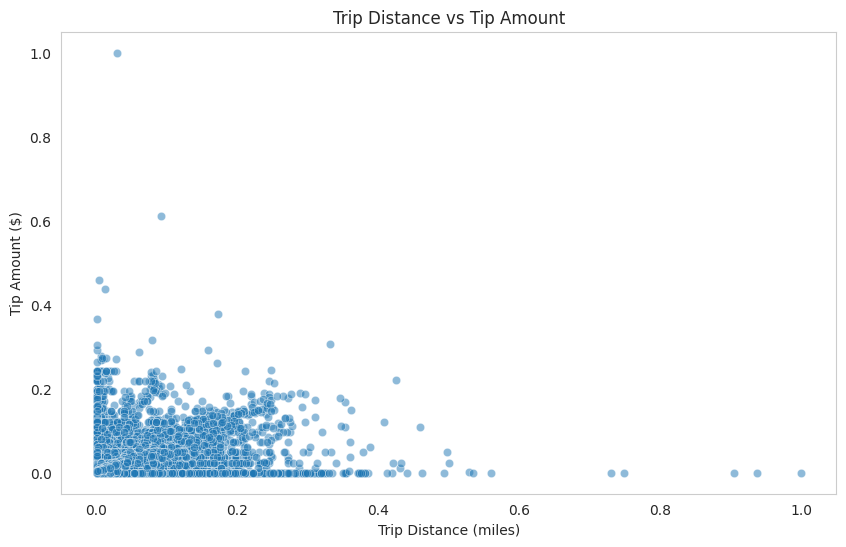

Correlation between trip distance and tip amount: 0.57


In [ ]:
# Show relationship between tip and trip distance

df['trip_distance'] = df['trip_distance'].astype(float)
df['tip_amount'] = df['tip_amount'].astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5)
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid()
plt.show()

# correlation between trip distance and tip amount
correlation = df[['trip_distance', 'tip_amount']].corr().iloc[0, 1]
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")




**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-48-3dc8120cfd97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Type', y='Count', data=payment_counts, palette="magma")


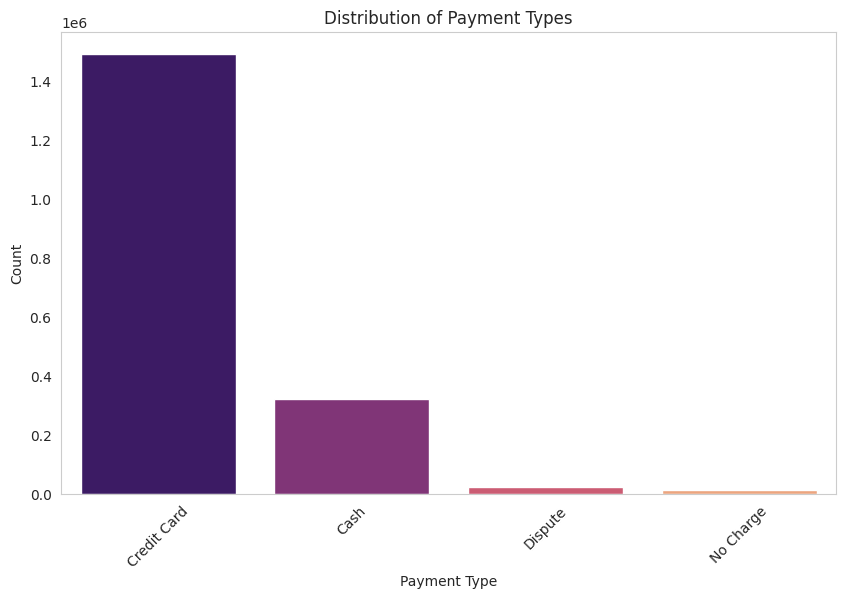

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df['payment_type'].value_counts()
payment_counts = payment_counts.rename({1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'})
payment_counts = payment_counts.rename_axis('Payment Type').reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Type', y='Count', data=payment_counts, palette="magma")
plt.title('Distribution of Payment Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()







- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 323.6/323.6 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 16.2/16.2 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 159.6/159.6 kB 9.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import geopandas as gpd



**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

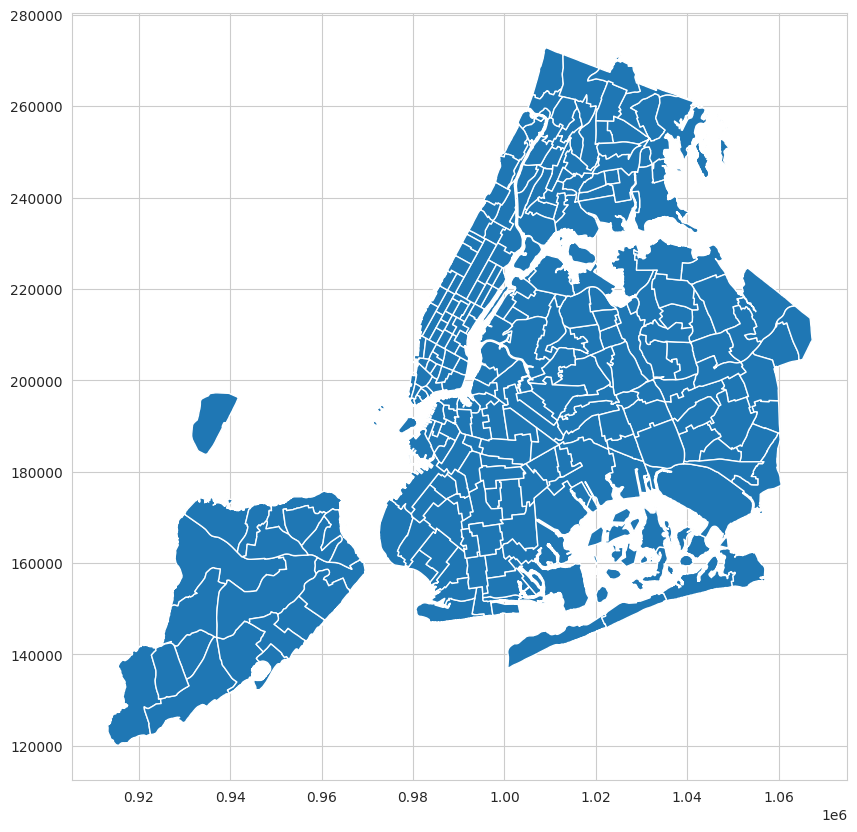

In [ ]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot(figsize=(10, 10))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()






VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-07-01 00:36:53   2023-07-01 00:44:52              3.0   
1         1  2023-07-01 00:41:47   2023-07-01 00:44:30              2.0   
2         2  2023-07-01 00:20:02   2023-07-01 00:46:03              2.0   
3         2  2023-07-01 00:50:54   2023-07-01 00:57:54              1.0   
4         2  2023-07-01 00:13:32   2023-07-01 00:52:21              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0       0.005362         1.0           230           246             1   
1       0.001787         1.0           107           234             3   
2       0.046557         1.0           132            72             2   
3       0.007998         1.0           263           229             1   
4       0.042134         1.0           132           198             2   

   fare_amount  ...  pickup_day  pickup_month  trip_duration  OBJECTID  \
0     0.009507  ...    Saturday             7       7.983333     230.0   
1     0.004864  ...    Saturday             7       2.716667     107.0   
2     0.046650  ...    Saturday             7      26.016667     132.0   
3     0.011055  ...    Saturday             7       7.000000     263.0   
4     0.053615  ...    Saturday             7      38.816667     132.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.031028    0.000056  Times Sq/Theatre District       230.0  Manhattan   
1    0.038041    0.000075                   Gramercy       107.0  Manhattan   
2    0.245479    0.002038                JFK Airport       132.0     Queens   
3    0.037017    0.000066             Yorkville West       263.0  Manhattan   
4    0.245479    0.002038                JFK Airport       132.0     Queens   

                                            geometry  
0  POLYGON ((988786.877 214532.094, 988650.277 21...  
1  POLYGON ((989131.643 205749.904, 989084.531 20...  
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  POLYGON ((997493.323 220912.386, 997355.264 22...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

# Group data by pickup location (PULocationID) and count trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

# Display the result
trip_counts.head()  # Show the first few rows



PULocationID  num_trips
0             1        246
1             2          2
2             3         47
3             4       1861
4             5         19

<ipython-input-59-067c97ed6eba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PULocationID', y='num_trips', data=top_10_locations, palette="magma") # Create a bar plot for the top 10 locations


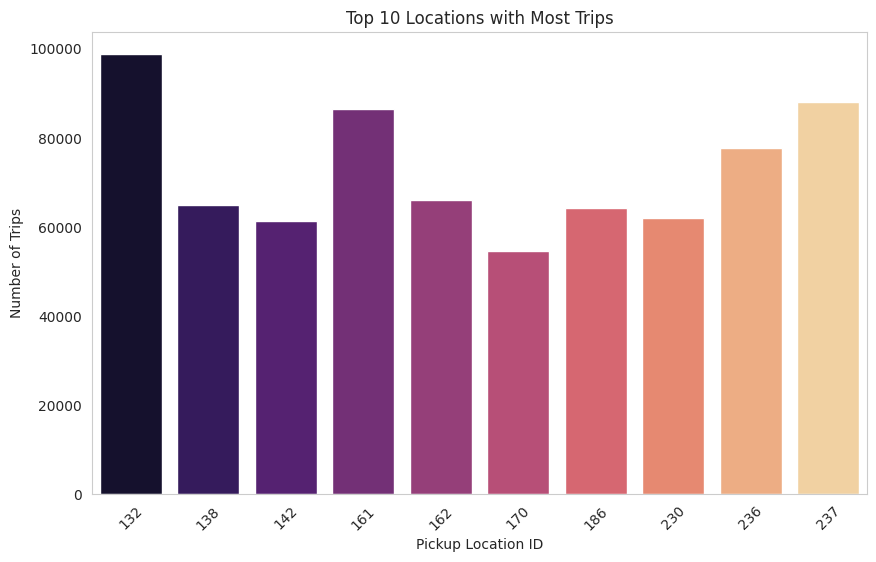

In [ ]:
#plot the top 10 locations with most trips
top_10_locations = trip_counts.nlargest(10, 'num_trips')  # Get the top 10 locations with most trips
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x='PULocationID', y='num_trips', data=top_10_locations, palette="magma") # Create a bar plot for the top 10 locations
plt.title('Top 10 Locations with Most Trips') # Set the title of the plot
plt.xlabel('Pickup Location ID') # Set the x-axis label
plt.ylabel('Number of Trips') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
zones.head(10) # Check the first 10 rows of the zones dataframe

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6         7    0.107417    0.000390                  Astoria           7   
7         8    0.027591    0.000027             Astoria Park           8   
8         9    0.099784    0.000338               Auburndale           9   
9        10    0.099839    0.000436             Baisley Park          10   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...  
6         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...  
7         Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...  
8         Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...  
9         Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Display the merged GeoDataFrame
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips  
0           1.0      246.0  
1           2.0        2.0  
2           3.0       47.0  
3           4.0     1861.0  
4           5.0       19.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

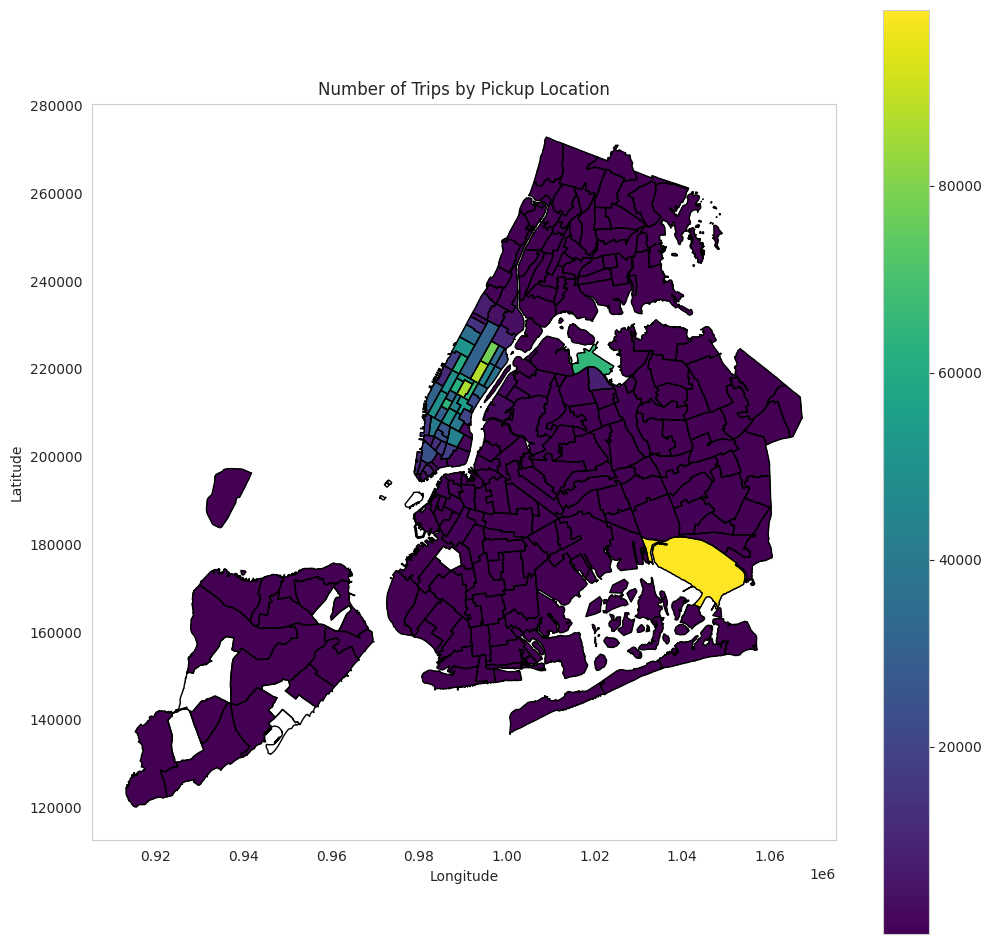

In [ ]:


# Plot the number of trips by location on the map and map with all the locations includes all the locations in the zones dataframe
fig, ax = plt.subplots(figsize=(12, 12)) # Set the figure size

zones_with_trips.boundary.plot(ax=ax, linewidth=1, color='black') # Plot the boundaries of the zones
zones_with_trips.plot(column='num_trips', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5) # Plot the zones with trip counts
plt.title('Number of Trips by Pickup Location') # Set the title of the plot
plt.xlabel('Longitude') # Set the x-axis label
plt.ylabel('Latitude') # Set the y-axis label
plt.grid() # Add grid lines to the plot
plt.show() # Show the plot




In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips.sort_values(by='num_trips', ascending=False).head(10) # Display the top 10 locations with most trips
# Display the top 10 locations with most trips
top_10_zones = zones_with_trips.sort_values(by='num_trips', ascending=False).head(10) # Store the top 10 locations with most trips
top_10_zones # Display the top 10 locations




OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     PULocationID  num_trips  
131         132.0    98789.0  
236         237.0    87946.0  
160         161.0    86405.0  
235         236.0    77635.0  
161         162.0    66102.0  
137         138.0    64858.0  
185         186.0    64201.0  
229         230.0    61880.0  
141         142.0    61186.0  
169         170.0    54490.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
# Group by pickup and dropoff locations and hour of the day
grouped_locations = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({'trip_distance': 'mean', 'fare_amount': 'mean'}).reset_index()

#calculating average trip duration and distance for each group
grouped_locations['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
grouped_locations['average_speed'] = grouped_locations['trip_distance'] / grouped_locations['trip_duration']
grouped_locations['average_speed'] = grouped_locations['average_speed'].replace([np.inf, -np.inf], np.nan)
grouped_locations = grouped_locations.dropna(subset=['average_speed'])

# Display the top 10 slowest routes with average speed and trip duration and distance
slowest_routes = grouped_locations.nsmallest(10, 'average_speed')
slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'average_speed', 'trip_duration', 'trip_distance']]


PULocationID  DOLocationID  pickup_hour  average_speed  trip_duration  \
0              1             1            3            0.0       7.983333   
2              1             1            6            0.0      26.016667   
3              1             1            7            0.0       7.000000   
5              1             1            9            0.0      12.683333   
8              1             1           12            0.0      12.766667   
17             1             1           21            0.0      21.500000   
18             1             1           23            0.0      10.266667   
23             1           141            4            0.0      13.900000   
30             1           264            5            0.0       3.350000   
32             1           264            7            0.0      24.183333   

    trip_distance  
0             0.0  
2             0.0  
3             0.0  
5             0.0  
8             0.0  
17            0.0  
18            0.0  
23            0.0  
30            0.0  
32            0.0

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<ipython-input-65-97ca10154e5e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='num_trips', data=hourly_trip_counts, palette="magma")


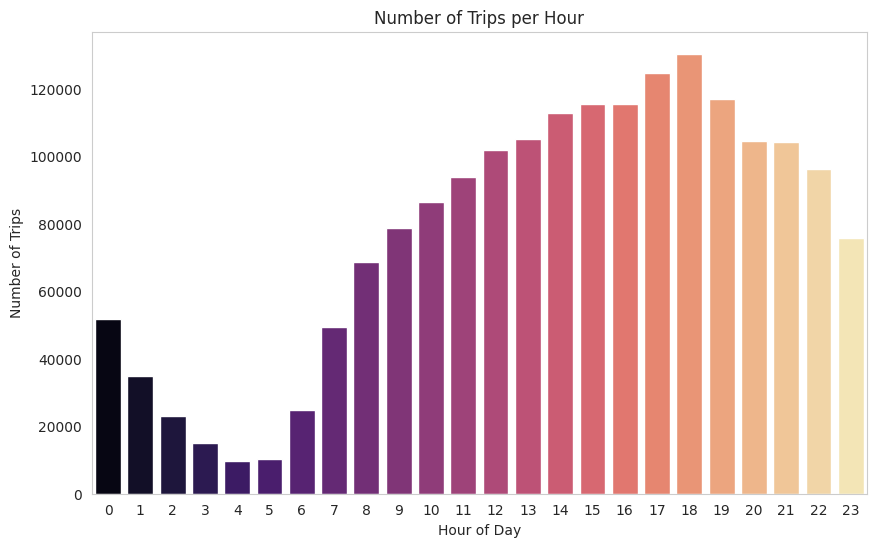

Busiest hour: 18 with 130389 trips
Busiest day of the week: Thursday
Busiest month of the year: 5
Busiest day of the month: 2023-12-14


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trip_counts = df.groupby('pickup_hour').size().reset_index(name='num_trips')
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='num_trips', data=hourly_trip_counts, palette="magma")
plt.title('Number of Trips per Hour')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()

# busiest hour
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['num_trips'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['num_trips']} trips")
# busiest day of the week
busiest_day = df['pickup_day'].value_counts().idxmax()
print(f"Busiest day of the week: {busiest_day}")
# busiest month of the year
busiest_month = df['pickup_month'].value_counts().idxmax()
print(f"Busiest month of the year: {busiest_month}")
# busiest day of the month
busiest_day_of_month = df['pickup_date'].value_counts().idxmax()
print(f"Busiest day of the month: {busiest_day_of_month}")





Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# show the number of trips counts based on hourly data in descending order
hourly_trip_counts = df.groupby('pickup_hour').size().reset_index(name='num_trips')
hourly_trip_counts = hourly_trip_counts.sort_values(by='num_trips', ascending=False)
hourly_trip_counts.head(5)


# Scale up the number of trips by multiplying by the sampling fraction
scaled_trip_counts = hourly_trip_counts.copy()
scaled_trip_counts['num_trips'] = (scaled_trip_counts['num_trips'] / sample_fraction).astype(int)
scaled_trip_counts = scaled_trip_counts.sort_values(by='num_trips', ascending=False)
scaled_trip_counts.head(5)



pickup_hour  num_trips
18           18    1303890
17           17    1247960
19           19    1169170
16           16    1154890
15           15    1154830

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

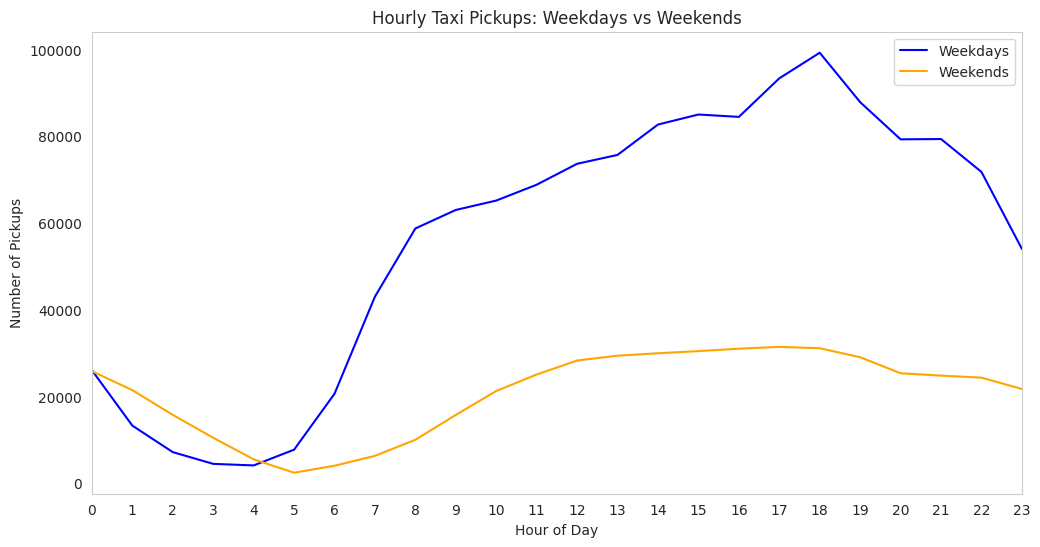

In [ ]:
# Compare traffic trends for the week days and weekends
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly_counts.index, y=weekday_hourly_counts.values, label='Weekdays', color='blue')
sns.lineplot(x=weekend_hourly_counts.index, y=weekend_hourly_counts.values, label='Weekends', color='orange')

plt.title('Hourly Taxi Pickups: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24, 1))
plt.xlim(0, 23)
plt.grid()
plt.legend()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

# Group data by pickup and dropoff locations and count trips
top_pickup_locations = df['PULocationID'].value_counts().head(10).reset_index()
top_pickup_locations.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
top_pickup_locations = top_pickup_locations.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pickup_locations









Top 10 Pickup Zones:


LocationID  Pickup_Trips                          zone
0         132         98789                   JFK Airport
1         237         87946         Upper East Side South
2         161         86405                Midtown Center
3         236         77635         Upper East Side North
4         162         66102                  Midtown East
5         138         64858             LaGuardia Airport
6         186         64201  Penn Station/Madison Sq West
7         230         61880     Times Sq/Theatre District
8         142         61186           Lincoln Square East
9         170         54490                   Murray Hill

In [ ]:
top_dropoff_locations = df['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff_locations.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get zone names
top_dropoff_locations = top_dropoff_locations.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
top_dropoff_locations


Top 10 Dropoff Zones:


LocationID  Dropoff_Trips                       zone
0         236          82124      Upper East Side North
1         237          78416      Upper East Side South
2         161          72751             Midtown Center
3         230          57314  Times Sq/Theatre District
4         170          54633                Murray Hill
5         162          52088               Midtown East
6         239          51928      Upper West Side South
7         142          51818        Lincoln Square East
8         141          48926            Lenox Hill West
9          68          46336               East Chelsea

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff
#ratio of pickup to dropoff in each zone



pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_pickup_dropoff_ratio)



Top 10 Pickup/Dropoff Ratios:
zone
East Elmhurst                   7.602473
JFK Airport                     4.462418
LaGuardia Airport               2.904523
Penn Station/Madison Sq West    1.590196
Greenwich Village South         1.380461
Central Park                    1.358355
West Village                    1.338495
Midtown East                    1.269045
Garment District                1.190779
Midtown Center                  1.187681
Name: pickup_dropoff_ratio, dtype: float64


In [ ]:
print("Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_pickup_dropoff_ratio)

Bottom 10 Pickup/Dropoff Ratios:
zone
Freshkills Park                0.000000
Rossville/Woodrow              0.000000
Green-Wood Cemetery            0.000000
Grymes Hill/Clifton            0.000000
Oakwood                        0.000000
Heartland Village/Todt Hill    0.023256
Saint George/New Brighton      0.025000
West Brighton                  0.041667
Highbridge Park                0.044444
Newark Airport                 0.044711
Name: pickup_dropoff_ratio, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)] # Filter for night hours
night_pickup_counts = night_hours['PULocationID'].value_counts().head(10).reset_index()
night_pickup_counts.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
night_pickup_counts = night_pickup_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones during Night Hours:")
print(night_pickup_counts)
night_dropoff_counts = night_hours['DOLocationID'].value_counts().head(10).reset_index()
night_dropoff_counts.columns = ['LocationID', 'Dropoff_Trips']







Top 10 Pickup Zones during Night Hours:
   LocationID  Pickup_Trips                          zone
0          79         15755                  East Village
1         132         14802                   JFK Airport
2         249         12711                  West Village
3          48         10532                  Clinton East
4         148          9811               Lower East Side
5         114          8846       Greenwich Village South
6         230          8329     Times Sq/Theatre District
7         186          7051  Penn Station/Madison Sq West
8         164          6311                 Midtown South
9          68          6151                  East Chelsea


In [ ]:
print('night_dropoff_counts')
# Merge with zones to get zone names
night_dropoff_counts = night_dropoff_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones during Night Hours:")
print(night_dropoff_counts)


night_dropoff_counts
Top 10 Dropoff Zones during Night Hours:
   LocationID  Dropoff_Trips                       zone
0          79           8459               East Village
1          48           7273               Clinton East
2         170           6254                Murray Hill
3          68           5799               East Chelsea
4         107           5764                   Gramercy
5         141           5357            Lenox Hill West
6         263           5109             Yorkville West
7         249           5041               West Village
8         230           4834  Times Sq/Theatre District
9          90           4483                   Flatiron


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Nighttime Revenue Share: 12.09%
Daytime Revenue Share: 87.91%


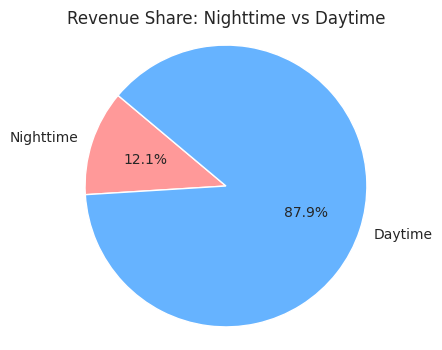

In [ ]:
#plot pie chart for night time revenue share vs day time revenue share
plt.figure(figsize=(4, 4)) # Set the figure size
plt.pie([nighttime_revenue_share, daytime_revenue_share], labels=['Nighttime', 'Daytime'], autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF']) # Create a pie chart for nighttime and daytime revenue share
plt.title('Revenue Share: Nighttime vs Daytime') # Set the title of the plot
plt.axis('equal') # Set the axis to be equal for a circular pie chart
plt.show() # Show the plot


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger



<ipython-input-76-a58d212e264e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])


passenger_count
1.0    4.054886
2.0    2.363664
3.0    1.534000
4.0    1.477359
5.0    0.661306
6.0    0.593923
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)


<ipython-input-77-1b6e06db9246>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
<ipython-input-77-1b6e06db9246>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour
<ipython-input-77-1b6e06db9246>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Average Fare per Mile by Day of Week:
day_of_week
Monday       4.15
Tuesday      4.15
Wednesday    4.22
Thursday     4.41
Friday       4.30
Saturday     4.11
Sunday       4.28
Name: fare_per_mile, dtype: float64


<ipython-input-78-301b56de7bef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette="magma") # Create a bar plot for average fare per mile by day of week


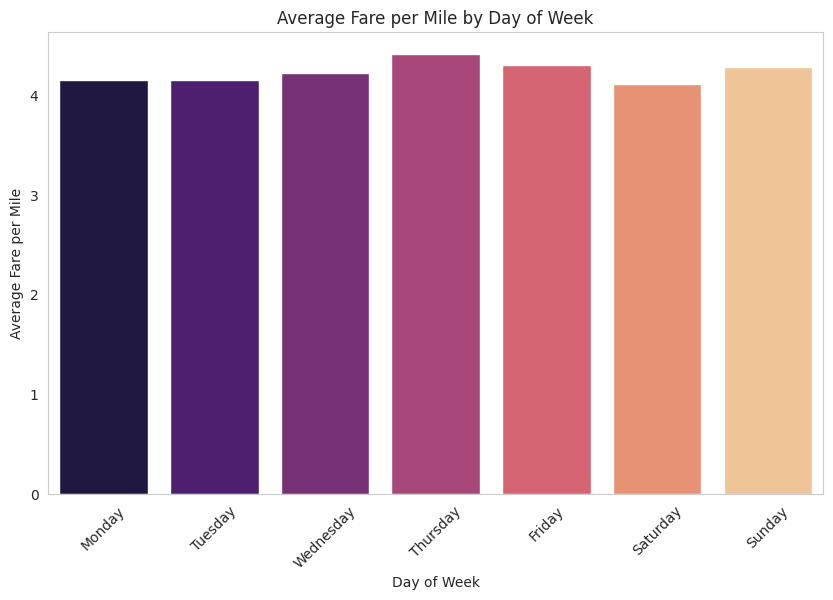

In [ ]:
print("Average Fare per Mile by Day of Week:")
print(fare_by_day)
# Plot the average fare per mile by day of week vs day of the week
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette="magma") # Create a bar plot for average fare per mile by day of week
plt.title('Average Fare per Mile by Day of Week') # Set the title of the plot
plt.xlabel('Day of Week') # Set the x-axis label
plt.ylabel('Average Fare per Mile') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot


avg_fare_by_hour
hour_of_day
0     4.06
1     3.83
2     3.96
3     4.18
4     5.12
5     4.85
6     3.53
7     3.68
8     3.62
9     4.03
10    4.04
11    4.03
12    4.22
13    4.20
14    4.40
15    4.62
16    5.11
17    4.79
18    4.46
19    4.63
20    3.84
21    3.83
22    3.85
23    3.85
Name: fare_per_mile, dtype: float64


<ipython-input-79-08c981ae10a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_by_hour.index, y=fare_by_hour.values, palette="magma") # Create a bar plot for average fare per mile by hour


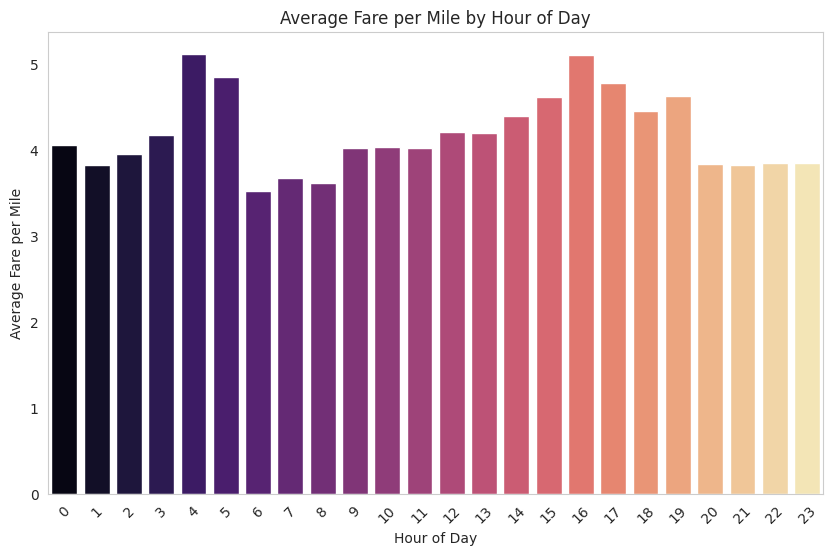

In [ ]:
print('avg_fare_by_hour')
print(fare_by_hour)
#plot average fare per by hour with hour on x axis and fare on y axis
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x=fare_by_hour.index, y=fare_by_hour.values, palette="magma") # Create a bar plot for average fare per mile by hour
plt.title('Average Fare per Mile by Hour of Day') # Set the title of the plot
plt.xlabel('Hour of Day') # Set the x-axis label
plt.ylabel('Average Fare per Mile') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<ipython-input-80-3695ddbb5188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['vendor_id'] = valid_df['VendorID'].replace({1: 'Creative', 2: 'VeriFone'}) # Replace vendor IDs with names
<ipython-input-80-3695ddbb5188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance'] # Calculate fare per mile
<ipython-input-80-3695ddbb5188>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

Average Fare per Mile by Vendor:
vendor_id
Creative    3.30
VeriFone    4.56
Name: fare_per_mile, dtype: float64


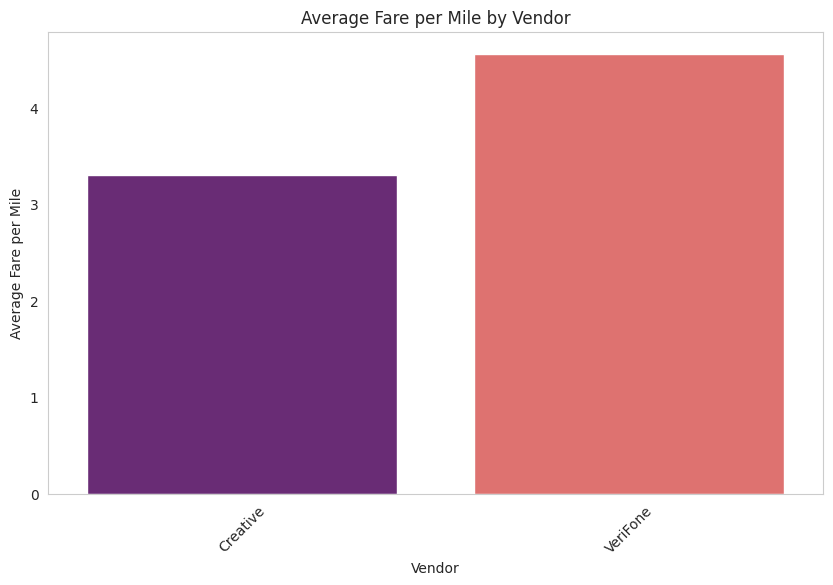

In [ ]:
# Compare fare per mile for different vendors
valid_df['vendor_id'] = valid_df['VendorID'].replace({1: 'Creative', 2: 'VeriFone'}) # Replace vendor IDs with names
valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance'] # Calculate fare per mile
fare_by_vendor = valid_df.groupby('vendor_id')['fare_per_mile'].mean().round(2) # Group by vendor and calculate average fare per mile
print("Average Fare per Mile by Vendor:")
print(fare_by_vendor) # Print the average fare per mile by vendor

# Plot the average fare per mile by vendor with vendor on x axis and fare on y axis
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x=fare_by_vendor.index, y=fare_by_vendor.values, palette="magma") # Create a bar plot for average fare per mile by vendor
plt.title('Average Fare per Mile by Vendor') # Set the title of the plot
plt.xlabel('Vendor') # Set the x-axis label
plt.ylabel('Average Fare per Mile') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot






**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Distance Category Distribution:
distance_category
Short     1850130
Medium          1
Name: count, dtype: int64


<ipython-input-82-93c39aed7f94>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='fare_amount', data=df, palette="magma") # Create a bar plot for average fare amount by distance category


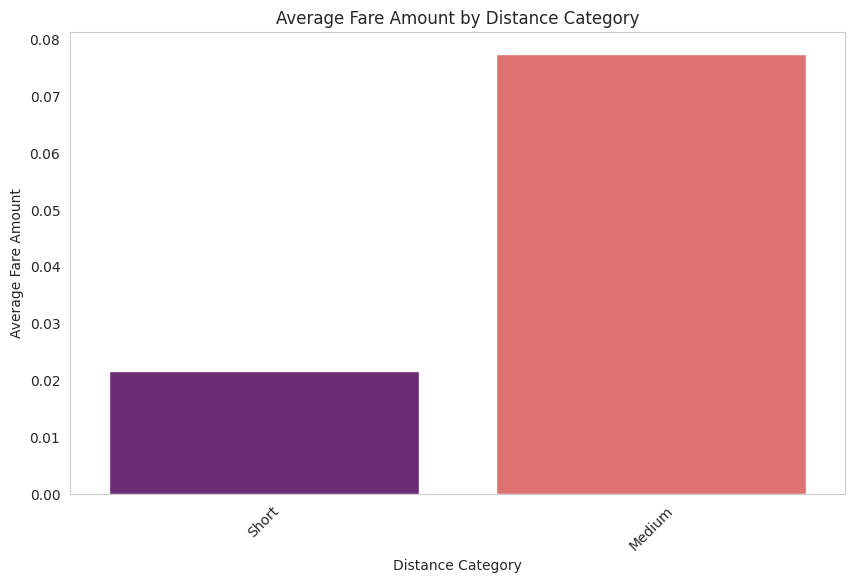

In [ ]:
# Defining distance tiers
distance_tiers = {
    'Short': (0, 1),
    'Medium': (1, 3),
    'Long': (3, 10),
    'Very Long': (10, float('inf'))
}

# Function to categorize trip distance
def categorize_distance(distance):
    for tier, (lower, upper) in distance_tiers.items():
        if lower <= distance < upper:
            return tier
    return 'Unknown'

# Apply the function to create a new column for distance category
df['distance_category'] = df['trip_distance'].apply(categorize_distance)
# Display the first few rows of the updated DataFrame
print("Distance Category Distribution:")
print(df['distance_category'].value_counts())
df.head(5) # Check the first 10 rows of the dataframe

#plot graph for distance category vs average fare amount
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x='distance_category', y='fare_amount', data=df, palette="magma") # Create a bar plot for average fare amount by distance category
plt.title('Average Fare Amount by Distance Category') # Set the title of the plot
plt.xlabel('Distance Category') # Set the x-axis label
plt.ylabel('Average Fare Amount') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100  # Avoid division by zero

tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tips_df['hour'] = tips_df['pickup_hour']

tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tips_df['time_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nMost Common Low Tip Scenarios:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
                     .size()
                     .sort_values(ascending=False)
                     .head(10))
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()





Average Tip Percentage by Distance:
distance_category
Up to 2 miles        227.065949
2 to 5 miles                NaN
More than 5 miles           NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       271.323681
2-3 passengers    301.723041
4+ passengers     277.175755
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    632.364964
6 AM to Noon        202.406846
Noon to 6 PM        277.730912
6 PM to Midnight    231.544239
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        120101
                                       6 PM to Midnight     90770
                                       6 AM to Noon         75362
                   2-3 passengers      Noon to 6 PM         36849
                                       6 PM to Midnight 

<ipython-input-83-9c822aef5f72>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('distance_category')['tip_percentage'].mean())
<ipython-input-83-9c822aef5f72>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('passenger_category')['tip_percentage'].mean())
<ipython-input-83-9c822aef5f72>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('time_category')[

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

<ipython-input-84-590d35134e55>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_tip_factors = low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().reset_index(name='count')
<ipython-input-84-590d35134e55>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_tip_factors = high_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().reset_index(name='count')


Most Common Low Tip Scenarios:
   distance_category passenger_category     time_category   count
2      Up to 2 miles        1 passenger      Noon to 6 PM  120101
3      Up to 2 miles        1 passenger  6 PM to Midnight   90770
1      Up to 2 miles        1 passenger      6 AM to Noon   75362
6      Up to 2 miles     2-3 passengers      Noon to 6 PM   36849
7      Up to 2 miles     2-3 passengers  6 PM to Midnight   30133
0      Up to 2 miles        1 passenger  Midnight to 6 AM   27433
5      Up to 2 miles     2-3 passengers      6 AM to Noon   16212
10     Up to 2 miles      4+ passengers      Noon to 6 PM    8880
4      Up to 2 miles     2-3 passengers  Midnight to 6 AM    7254
11     Up to 2 miles      4+ passengers  6 PM to Midnight    7217

Most Common High Tip Scenarios:
   distance_category passenger_category     time_category   count
2      Up to 2 miles        1 passenger      Noon to 6 PM  374989
3      Up to 2 miles        1 passenger  6 PM to Midnight  365334
1      Up to

<ipython-input-84-590d35134e55>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='tip_percentage', data=tips_df, palette="magma") # Create a bar plot for average tip percentage by distance category


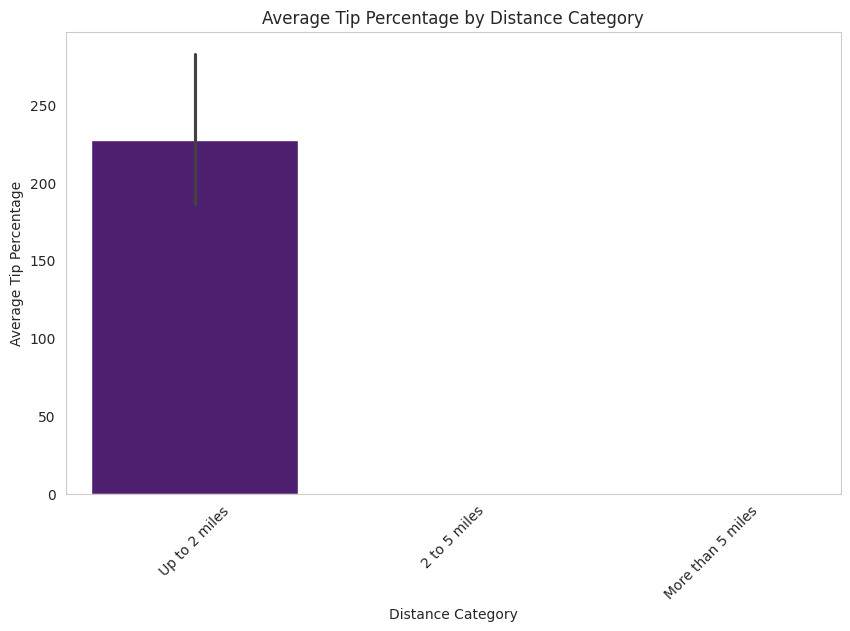

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 10% and find the most common factors
low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
high_tip_factors = tips_df[tips_df['tip_percentage'] > 10]
low_tip_factors = low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().reset_index(name='count')
high_tip_factors = high_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category']).size().reset_index(name='count')
low_tip_factors = low_tip_factors.sort_values(by='count', ascending=False).head(10)
high_tip_factors = high_tip_factors.sort_values(by='count', ascending=False).head(10)
print("Most Common Low Tip Scenarios:")
print(low_tip_factors)
print("\nMost Common High Tip Scenarios:")
print(high_tip_factors)
# Plot the average tip percentage by distance category
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x='distance_category', y='tip_percentage', data=tips_df, palette="magma") # Create a bar plot for average tip percentage by distance category
plt.title('Average Tip Percentage by Distance Category') # Set the title of the plot
plt.xlabel('Distance Category') # Set the x-axis label
plt.ylabel('Average Tip Percentage') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.show() # Show the plot






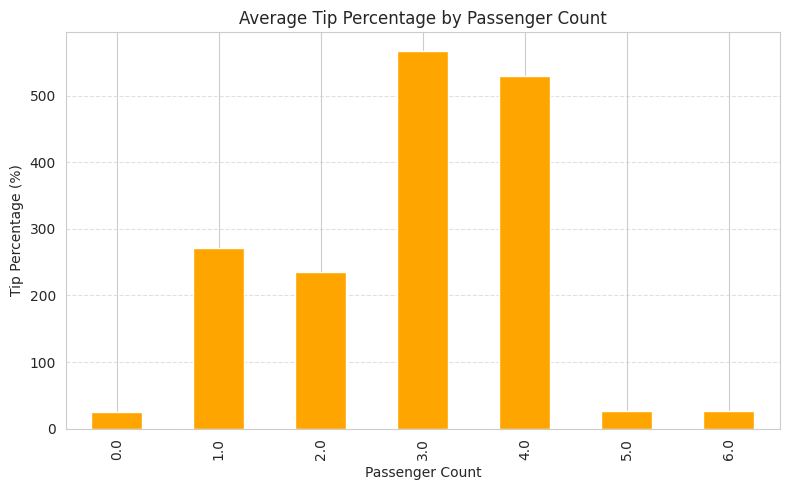

In [ ]:
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

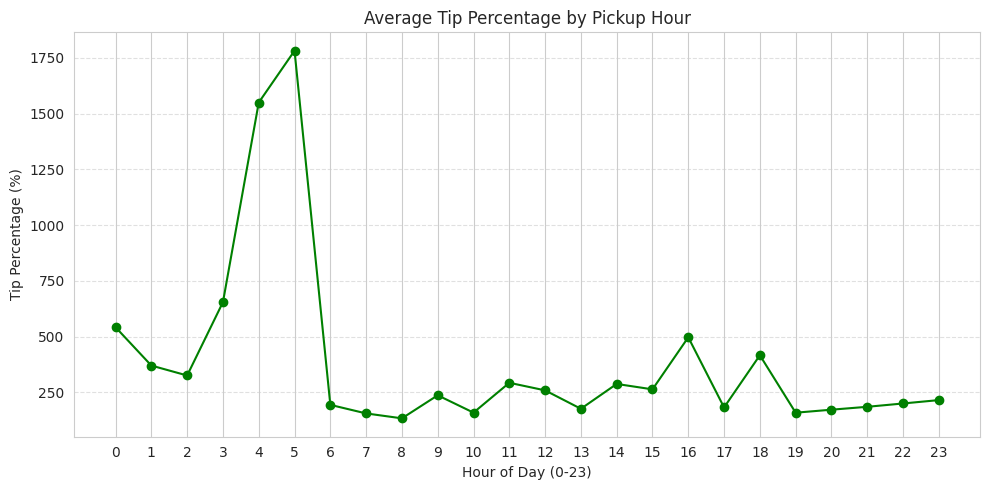

In [ ]:
# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [ ]:
df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.01
Avg Passenger Count            1.41             1.36
Avg Fare Amount                0.02             0.02
Avg Tip Amount                 0.00             0.01


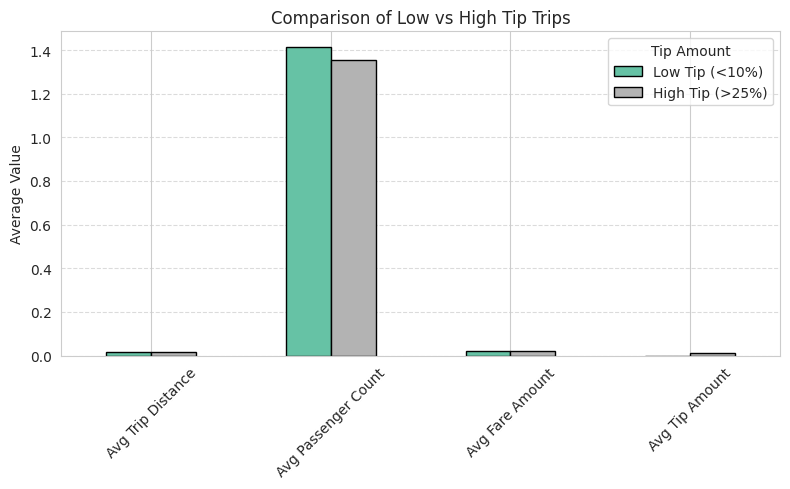

In [ ]:
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set2', edgecolor='black')
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tip Amount', loc='upper right')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

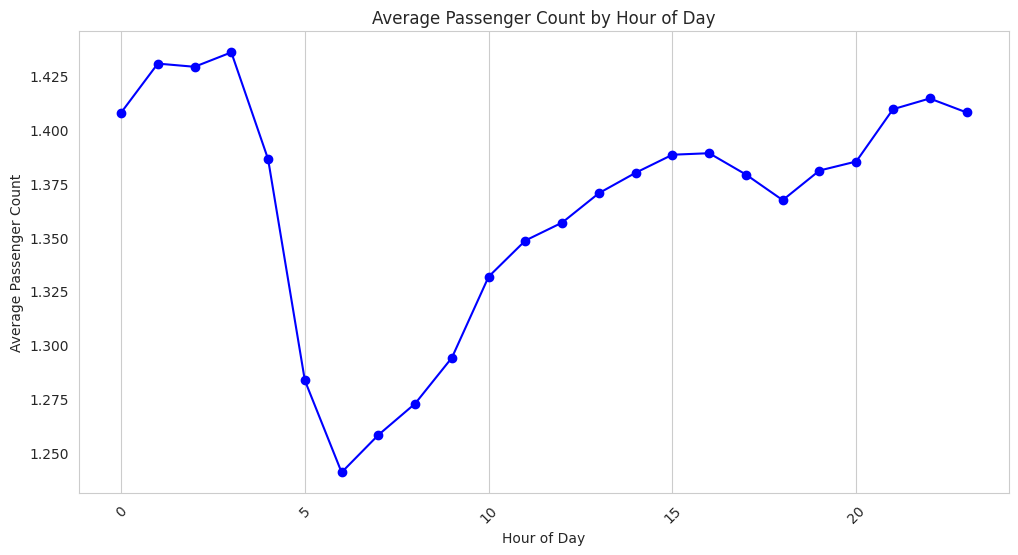

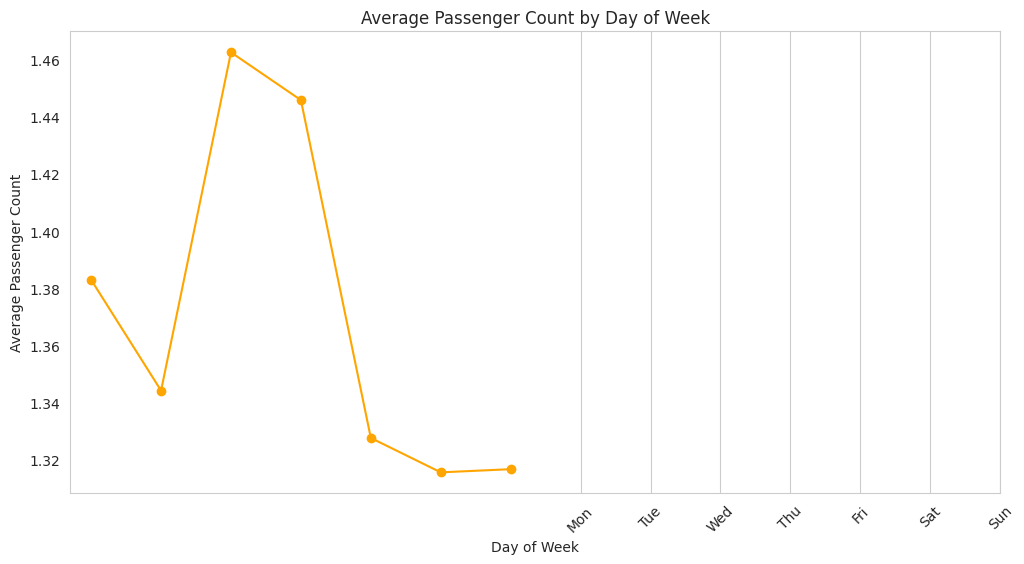

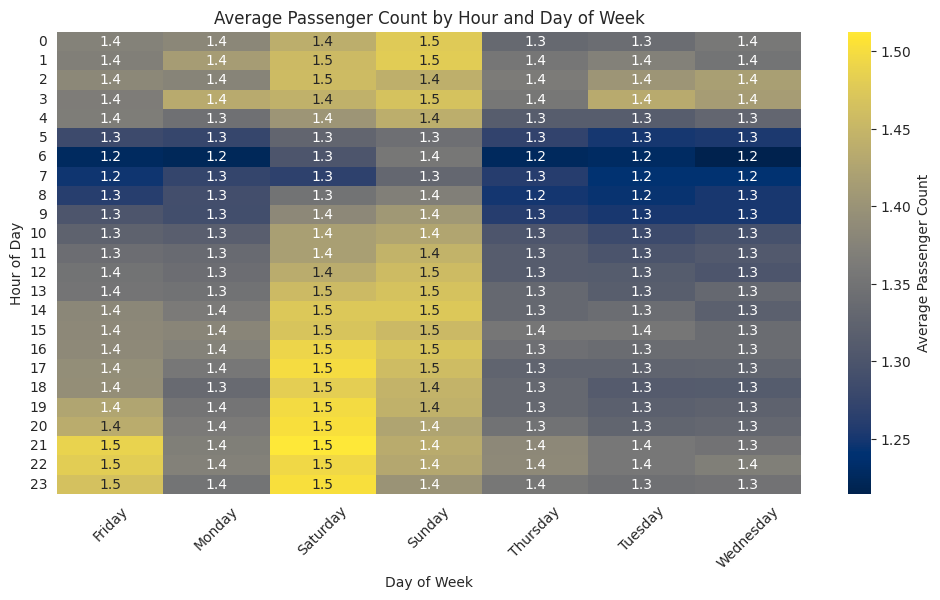

In [ ]:
# See how passenger count varies across hours and days

#Group by hour of the day and calculate average passenger count
avg_passenger_count_by_hour = df.groupby(df['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Group by day of the week and calculate average passenger count

avg_passenger_count_by_day = df.groupby(df['tpep_pickup_datetime'].dt.day_name())['passenger_count'].mean()

passenger_heatmap = df.groupby(['pickup_hour', 'pickup_day'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6)) # Set the figure size

plt.plot(avg_passenger_count_by_hour.index, avg_passenger_count_by_hour.values, marker='o', color='blue') # Plot average passenger count by hour
plt.title('Average Passenger Count by Hour of Day') # Set the title of the plot
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis

plt.show()


# Plot the variation of passenger count across days of the week
plt.figure(figsize=(12, 6)) # Set the figure size
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(avg_passenger_count_by_day.index, avg_passenger_count_by_day.values, marker='o', color='orange') # Plot average passenger count by day of the week
plt.title('Average Passenger Count by Day of Week') # Set the title of the plot
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.xticks(days_of_week)
plt.grid(axis='y')
plt.show() # Show the plot



#Heatmap - Passenger Count by Hour & Day

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_heatmap, cmap='cividis', annot=True, fmt=".1f", cbar_kws={'label': 'Average Passenger Count'})
plt.title('Average Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45)
plt.yticks(rotation=0) # Rotate y-axis labels for better readability
plt.grid(axis='y')
plt.show() # Show the plot








**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-90-6a9bdb2ff267>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')


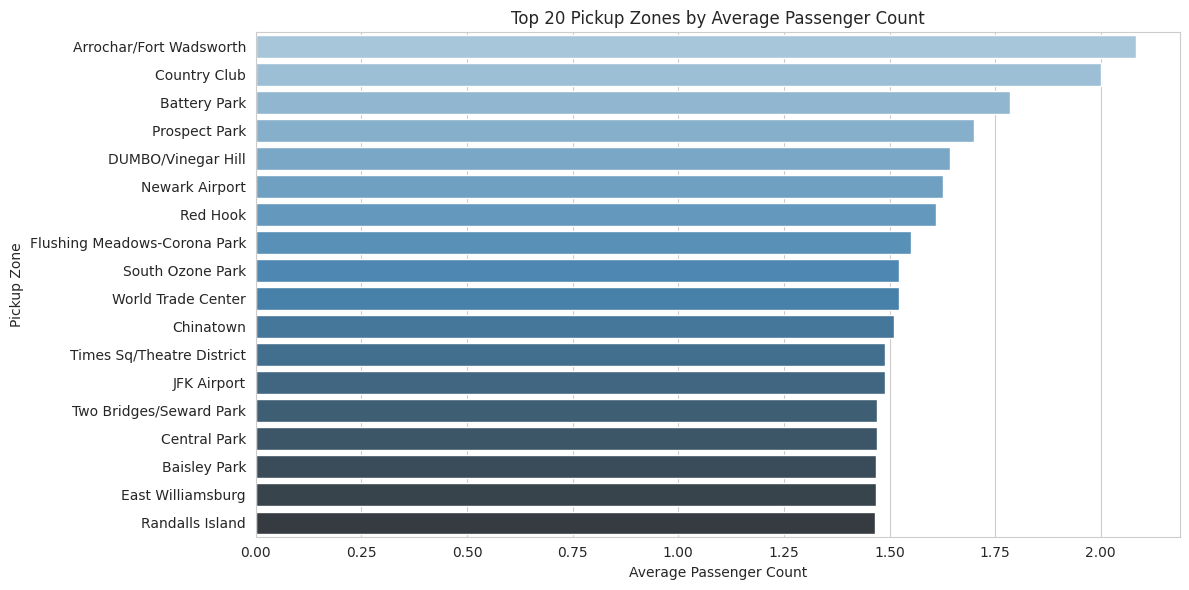

In [ ]:
# How does passenger count vary across zones


zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  num_trips  PULocationID_y  avg_passenger_count  
0             1.0      246.0             1.0             1.626016  
1             2.0        2.0             2.0             1.000000  
2             3.0       47.0             3.0             1.000000  
3             4.0     1861.0             4.0             1.405696  
4             5.0       19.0             5.0             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<ipython-input-92-e786df5c9982>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=extra_by_pickup_sorted.head(20), x='tpep_pickup_datetime', y='extra', palette='Blues_d') # Create a bar plot for extra charges


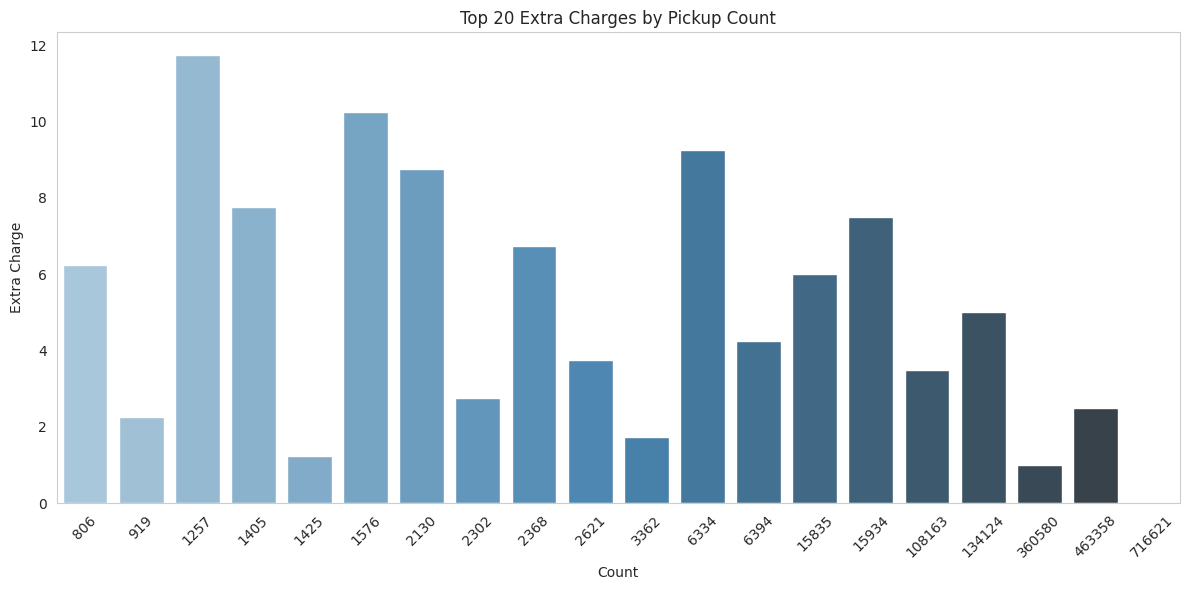

In [ ]:
# How often is each surcharge applied?

extra_by_pickup = df.groupby('extra')['tpep_pickup_datetime'].count().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by='tpep_pickup_datetime', ascending=False)

# Plot top 20 zones with highest extra charges

plt.figure(figsize=(12, 6)) # Set the figure size
sns.barplot(data=extra_by_pickup_sorted.head(20), x='tpep_pickup_datetime', y='extra', palette='Blues_d') # Create a bar plot for extra charges
plt.title('Top 20 Extra Charges by Pickup Count') # Set the title of the plot
plt.xlabel('Count') # Set the x-axis label
plt.ylabel('Extra Charge') # Set the y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.grid(axis='y') # Add grid lines to the y-axis
plt.tight_layout() # Adjust the layout to fit the plot
plt.show() # Show the plot



Frequency of Surcharge Application (%):
extra                    61.266472
tip_amount               76.855423
tolls_amount              8.020243
improvement_surcharge    98.951750
congestion_surcharge     91.334181
dtype: float64


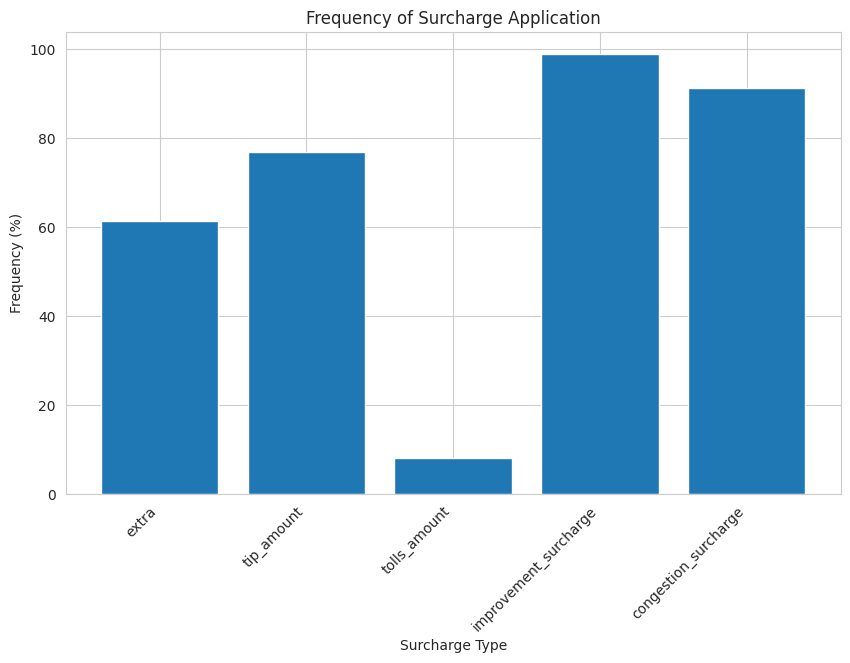

In [ ]:
surcharge_cols = ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



*** Below are the key observations from the analysis what we have done ***

- Temporial Analysis:
Based on analysis we observed the max number of pickups during the 2nd half of the day, i.e. 15 hours to 19 hours. Also, when it is considered the days of the week, we can observe the middle of the week we are having max number of pickups.

- Financial analysis:
We can observe that the month of the year generated more revenue, when we compared it to the quarterly revenue in year Q4, generating more revenue followed by Q2

We can see a positive correlation between Fare amount and Trip distance.
Also, when we compared Trip duration and Fare amount, we strongly say majority of the trips are short and not expensive
also, when single passengers involved in the ride contribute more fare amount

And with cannot observe any correlation between Tip amount and the trip distance.

- Geo graphical analysis:
We can observe a greater number of trips are booked from Airport and bay areas,
And observed during evening rush in the bookings are comparatively high with morning bookings
Also based on observations we can see weekend trips are low with weekday trips
In revenue generation we can observe daytime revenue is very high from Niht time revenue

- Pricing strategy and Customer experience with other factors
Passenger count is 3 we can get maximum percentage of the tip amounts
And during the start of the day we can observe max amount of tips

*** Optimization recommendation ***

- We observed most of the pickups are located few areas, so increase vehicle availability in high demand zones during rush hours
- As most pickups are at Airport area need to prioritize that area at night hours
- As per the tips data, increase service quality where customers attracted more
- Based on historical data arrange vehicles in non-demanding zones in specific months
- Introduce dynamic pricing in demanded areas
- As we observed most of the time customer count is 3 and less than 3 vehicles arrange accordingly




**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

*** Strategic cab positioning recommendation ***
# Based on the analysis, we can recommend strategic cab positioning in the following areas:
 - Observe high demand zones and position cabs based on peak hours and meet the night demanded hours and event demand places
 - Observed the weekdays and weekend trends and position cabs near office areas during weekdays and near tourist places during weekends
 - Also observe the demand on holidays and tourist places
 - Adjust cab placement in high-surcharge areas and suggest alternate routes to avoid heavy traffic.
 - Utilize the heat map of the customers’ pickup data and place the cabs nears high density areas
 - As we observed most of the night pickups observed in Airport area, position the cabs according the data derived also based one the day and weekly trends


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

*** Data driven adjustments to the pricing strategy to maximize revenue ***
- Introduce dynamic pricing where adjust the fares based on real time demand supply, traffic conditions, and peak hours
- Apply high surge prize in the entertainment and airports during the night hours
- Maintain distance-based fare adjustments
- Encourage higher tipping via performance-based driver bonuses and app suggestion
- No extra charge for 1-2 passengers.
- Apply group surcharge for 3+ passengers. as we observe fare getting paid by more than three customers are comparatively less
- Aware the customers with pre-booking facility and apply incentives on pre booking
- Offer removing surcharge on the pre booking

These are the few recommendations to maintain the better pricing strategy to maximize the revenue.
